In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangla-sign-numeric/Data Sign/README.dataset.txt
/kaggle/input/bangla-sign-numeric/Data Sign/README.roboflow.txt
/kaggle/input/bangla-sign-numeric/Data Sign/data.yaml
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-0-Sample-3-_jpg.rf.3c58576364c6e08dbe6bed8d44399b5d.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-2-Sample-163-_jpg.rf.091e961c3a866332969f84dcbb3be828.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-1-Sample-111-_jpg.rf.344231cb5b87d938141896c0af07dfc6.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-3-Sample-236-_jpg.rf.fb9dbdf39b01df292e9222d36ccd8636.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-3-Sample-214-_jpg.rf.010ff05ff39bb8f4399e653405a2e24a.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-0-Sample-40-_jpg.rf.c916f55a2187118d18411ecc96452184.txt
/kaggle/input/bangla-sign-numeric/Data Sign/valid/labels/Sign-2-Sample-141-_jpg.rf.3ae1d56c50e16f7349e

# Importing Libary

In [2]:
!pip install ultralytics
!pip install comet-ml
from ultralytics import YOLO
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 13.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.6/710.6 kB 10.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 980.3/980.3 kB 24.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: python-box
    Found existing installation: python-box 7.2.0
    Uninstalling python-box-7.2.0:
      Successfully uninstalled python-box-7.2.0
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Showing The Sign

In [ ]:
import random 
image_dir='/kaggle/input/bangla-sign-numeric/Data Sign/train/images'
image_files = os.listdir(image_dir)
random_image_file = random.choice(image_files)
img_path = os.path.join(image_dir, random_image_file)

random_images = random.sample(image_files, 25)
label_files = '/kaggle/input/bangla-sign-numeric/Data Sign/train/labels'
fig, axs = plt.subplots(5, 5, figsize=(20, 20))

for i, image_file in enumerate(random_images):
    row = i // 5
    col = i % 5
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)
  
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(label_files, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)
        cv2.putText(image, "sign", (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2, cv2.LINE_AA)


    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

# Yolo Model

In [4]:
model = YOLO('yolov5s.yaml')
model = YOLO('yolov5s.pt')
model = YOLO('yolov5s.yaml').load('yolov5s.pt')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 17.7M/17.7M [00:00<00:00, 27.3MB/s]


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Transferred 427/427 items from pretrained weights


# Train model

In [5]:
history = model.train(data='/kaggle/input/bangla-sign-numeric/Data Sign/data.yaml', epochs=100, imgsz=256,
                    patience = 88, batch = 32,
                    project ="ASL", optimizer = 'Adam', momentum = 0.9,
                    cos_lr=True ,seed = 42, plots = True , close_mosaic = 0, lr0 = 0.001)

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov5s.yaml, data=/kaggle/input/bangla-sign-numeric/Data Sign/data.yaml, epochs=100, time=None, patience=88, batch=32, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=ASL, name=train, exist_ok=False, pretrained=yolov5s.pt, optimizer=Adam, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 22.2M/22.2M [00:01<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

train: Scanning /kaggle/input/bangla-sign-numeric/Data Sign/train/labels... 206 images, 0 backgrounds, 0 corrupt: 100%|██████████| 206/206 [00:00<00:00, 287.22it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/bangla-sign-numeric/Data Sign/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.24 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/bangla-sign-numeric/Data Sign/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 267.57it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/bangla-sign-numeric/Data Sign/valid is not writeable, cache not saved.


Plotting labels to ASL/train/labels.jpg... 


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Matplotlib currently does not support Bengali natively.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/plotting.py:954: UserWarning: Matplotlib curre

optimizer: Adam(lr=0.001, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to ASL/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      2.511      3.758      2.124         67        256:  14%|█▍        | 1/7 [00:07<00:44,  7.48s/it]


  0%|          | 0.00/755k [00:00<?, ?B/s]
100%|██████████| 755k/755k [00:00<00:00, 4.22MB/s]
      1/100         0G      1.853      2.595      1.666         27        256: 100%|██████████| 7/7 [00:39<00:00,  5.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all         29         29      0.818      0.454      0.509      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.399      1.378      1.355         35        256: 100%|██████████| 7/7 [00:35<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29       0.92        0.4      0.617       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G      1.387      1.056      1.251         33        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.887       0.44      0.424      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.297     0.9752      1.242         31        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.18s/it]

                   all         29         29      0.956        0.5      0.536      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.325     0.9395      1.286         35        256: 100%|██████████| 7/7 [00:35<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all         29         29      0.783      0.702       0.74       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G      1.323     0.9022       1.26         29        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29          1      0.953      0.995      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G       1.31     0.8763      1.257         23        256: 100%|██████████| 7/7 [00:35<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.807      0.942      0.982      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.292     0.8724      1.269         30        256: 100%|██████████| 7/7 [00:34<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.882      0.898      0.995      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G      1.232     0.8404      1.268         33        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.976          1      0.995      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G      1.321     0.8586      1.282         39        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         29         29      0.913      0.875      0.931      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G      1.316     0.8481      1.314         30        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.991          1      0.995      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G      1.246     0.8039      1.316         32        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.879          1      0.995      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G      1.349     0.8502      1.325         31        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.982      0.999      0.995      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G      1.317     0.8396        1.3         40        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.904      0.996      0.995      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G      1.279     0.8092      1.313         26        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.503      0.906       0.95      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G      1.256     0.8001      1.271         32        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all         29         29      0.978       0.98      0.993      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      1.218     0.7855      1.281         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29       0.97          1      0.995      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G       1.26     0.8273      1.297         32        256: 100%|██████████| 7/7 [00:35<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.952          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G      1.219     0.8104      1.272         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.931          1      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G      1.241      0.749      1.268         28        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.975          1      0.995      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      1.258     0.7453      1.276         30        256: 100%|██████████| 7/7 [00:34<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29       0.99          1      0.995       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G       1.33      0.765      1.286         41        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         29         29      0.981          1      0.995      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G       1.21     0.6909      1.267         31        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         29         29      0.826      0.944      0.995      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      1.176     0.7182      1.251         34        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.973          1      0.995      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G      1.274     0.6947      1.322         22        256: 100%|██████████| 7/7 [00:36<00:00,  5.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.972          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G      1.232     0.7166      1.274         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.983          1      0.995      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G      1.166     0.6809      1.254         29        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.951          1      0.995      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G      1.186     0.7237      1.271         28        256: 100%|██████████| 7/7 [00:35<00:00,  5.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.21s/it]

                   all         29         29       0.98          1      0.995      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G      1.252     0.7323      1.264         31        256: 100%|██████████| 7/7 [00:35<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all         29         29      0.929          1      0.982      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      1.168     0.7008      1.233         27        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.957      0.982      0.995       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G      1.173     0.7067      1.247         30        256: 100%|██████████| 7/7 [00:34<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.879      0.975       0.97      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G      1.155     0.7025       1.24         36        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all         29         29      0.986          1      0.995      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      1.226     0.6898      1.272         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all         29         29      0.992          1      0.995      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G      1.185     0.6644      1.264         24        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all         29         29      0.981          1      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G      1.128     0.6204      1.225         28        256: 100%|██████████| 7/7 [00:35<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.983          1      0.995      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G      1.158     0.6278      1.257         29        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.983          1      0.995      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      1.192     0.6857      1.248         37        256: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.824      0.993      0.995      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G      1.203     0.6532      1.248         31        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.936      0.928      0.995      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G      1.118     0.6507      1.213         31        256: 100%|██████████| 7/7 [00:34<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.521      0.813      0.568       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      1.156     0.6666      1.249         23        256: 100%|██████████| 7/7 [00:34<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.558       0.69      0.653       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G      1.195     0.7365      1.264         41        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all         29         29      0.735      0.696      0.864      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G      1.109     0.6632      1.226         33        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.899      0.996      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G      1.073     0.6309      1.196         34        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.992          1      0.995      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G      1.083     0.5986      1.201         35        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.987          1      0.995      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G      1.117     0.6211      1.233         25        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         29         29       0.99          1      0.995      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      1.127     0.6802      1.242         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.984          1      0.995      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G      1.092      0.639      1.239         28        256: 100%|██████████| 7/7 [00:35<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         29         29       0.99          1      0.995      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G      1.116     0.6361      1.204         40        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.983          1      0.995      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      1.142     0.6253      1.264         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.985          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      1.061     0.6201      1.214         35        256: 100%|██████████| 7/7 [00:34<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.985      0.993      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G      1.116     0.6314      1.234         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.992          1      0.995      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G      1.084     0.6105       1.22         34        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.999          1      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G        1.1     0.6101      1.231         33        256: 100%|██████████| 7/7 [00:35<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29       0.98          1      0.995      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G      1.114     0.6501      1.202         37        256: 100%|██████████| 7/7 [00:35<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.978      0.982      0.995      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      1.089     0.6303      1.218         36        256: 100%|██████████| 7/7 [00:34<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.894      0.909      0.995      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G      1.057     0.5845      1.189         40        256: 100%|██████████| 7/7 [00:34<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.987          1      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G      1.078     0.5846      1.217         28        256: 100%|██████████| 7/7 [00:34<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.986          1      0.995      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G      1.051     0.5737      1.186         29        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all         29         29      0.992          1      0.995      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.9936     0.5503      1.199         30        256: 100%|██████████| 7/7 [00:34<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.993          1      0.995      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G      1.067       0.58      1.207         35        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.986          1      0.995      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G      1.043     0.5766      1.197         29        256: 100%|██████████| 7/7 [00:35<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.985          1      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G      1.029     0.5959      1.184         29        256: 100%|██████████| 7/7 [00:35<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         29         29      0.984          1      0.995      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G      1.093     0.6003      1.185         33        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.981          1      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G       1.02     0.5466      1.151         36        256: 100%|██████████| 7/7 [00:35<00:00,  5.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.993          1      0.995      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.9949      0.541      1.175         40        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.992          1      0.995       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      1.029      0.587      1.205         31        256: 100%|██████████| 7/7 [00:34<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.992          1      0.995      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G      1.111     0.6087       1.22         29        256: 100%|██████████| 7/7 [00:34<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29       0.99          1      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G      1.002     0.5367      1.155         38        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.992          1      0.995      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      1.054     0.5587      1.186         33        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.992          1      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G       1.02     0.5455      1.162         29        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29       0.99          1      0.995      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.9967     0.5105      1.167         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.986          1      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      1.039     0.5272       1.17         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

                   all         29         29       0.99          1      0.995      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G      1.011     0.5075      1.183         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         29         29      0.991          1      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G      1.004     0.5405      1.148         32        256: 100%|██████████| 7/7 [00:35<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.987          1      0.995      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.9846     0.5074      1.156         31        256: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.987          1      0.995      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.9554     0.4904      1.135         34        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  2.00s/it]

                   all         29         29      0.989          1      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.9812     0.4994      1.145         36        256: 100%|██████████| 7/7 [00:35<00:00,  5.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29       0.99          1      0.995      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.9838     0.4751      1.168         31        256: 100%|██████████| 7/7 [00:35<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.13s/it]

                   all         29         29      0.991          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G      1.045      0.503      1.202         29        256: 100%|██████████| 7/7 [00:34<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all         29         29       0.99          1      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      1.021     0.5137      1.153         28        256: 100%|██████████| 7/7 [00:34<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all         29         29      0.987          1      0.995      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G      0.956     0.5132       1.15         29        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.985          1      0.995      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.9631     0.4842      1.156         35        256: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.986          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.9496     0.4843      1.153         26        256: 100%|██████████| 7/7 [00:34<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.986          1      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.9393     0.4975      1.136         27        256: 100%|██████████| 7/7 [00:34<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.987          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G     0.9683     0.4929      1.124         32        256: 100%|██████████| 7/7 [00:34<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.07s/it]

                   all         29         29       0.99          1      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.9733     0.4801      1.155         32        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.991          1      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.9249     0.4807      1.131         40        256: 100%|██████████| 7/7 [00:35<00:00,  5.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.991          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.9623     0.4961      1.144         31        256: 100%|██████████| 7/7 [00:35<00:00,  5.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.988          1      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.9582     0.4737      1.168         30        256: 100%|██████████| 7/7 [00:35<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.987          1      0.995      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.9513     0.4813      1.148         34        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.01s/it]

                   all         29         29      0.987          1      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G      1.005     0.5206      1.173         33        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.985          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.9596     0.4997      1.168         28        256: 100%|██████████| 7/7 [00:34<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.987          1      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.9963     0.4836      1.193         27        256: 100%|██████████| 7/7 [00:35<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all         29         29      0.987          1      0.995      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.9383     0.4983      1.165         23        256: 100%|██████████| 7/7 [00:35<00:00,  5.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.987          1      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.9754     0.5122      1.132         30        256: 100%|██████████| 7/7 [00:35<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.987          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.9945     0.5113      1.146         38        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all         29         29      0.986          1      0.995      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.9676     0.4688       1.13         40        256: 100%|██████████| 7/7 [00:35<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.11s/it]

                   all         29         29      0.986          1      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.9462     0.4945      1.153         27        256: 100%|██████████| 7/7 [00:34<00:00,  5.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.987          1      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.9581     0.4834      1.164         28        256: 100%|██████████| 7/7 [00:34<00:00,  4.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all         29         29      0.987          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.9502     0.4991      1.149         38        256: 100%|██████████| 7/7 [00:34<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all         29         29      0.987          1      0.995      0.771



100 epochs completed in 1.053 hours.
Optimizer stripped from ASL/train/weights/last.pt, 18.5MB
Optimizer stripped from ASL/train/weights/best.pt, 18.5MB

Validating ASL/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:469: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.

                   all         29         29      0.987          1      0.995      0.773
                     0         25         25      0.998          1      0.995      0.738
                     ১          4          4      0.976          1      0.995      0.809


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarnin

Speed: 0.2ms preprocess, 58.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to ASL/train


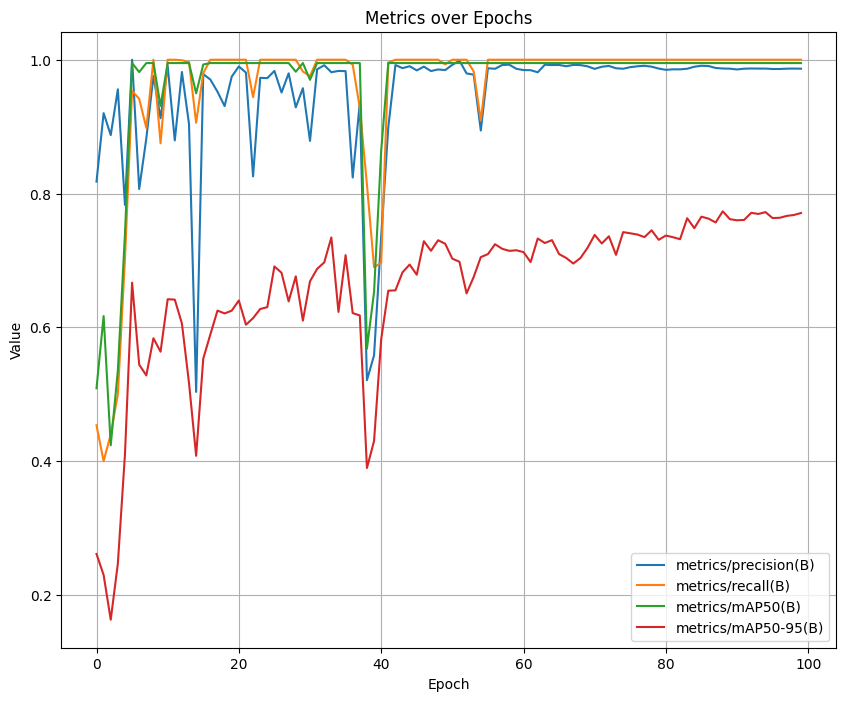

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/kaggle/working/ASL/train/results.csv')
metrics_to_plot = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

if all(col in df.columns for col in metrics_to_plot):
    plt.figure(figsize=(10,8))
    for metric in metrics_to_plot:
        plt.plot(df.index, df[metric], label=metric)
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Metrics over Epochs")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Error: Some specified metrics are not present in the DataFrame.")

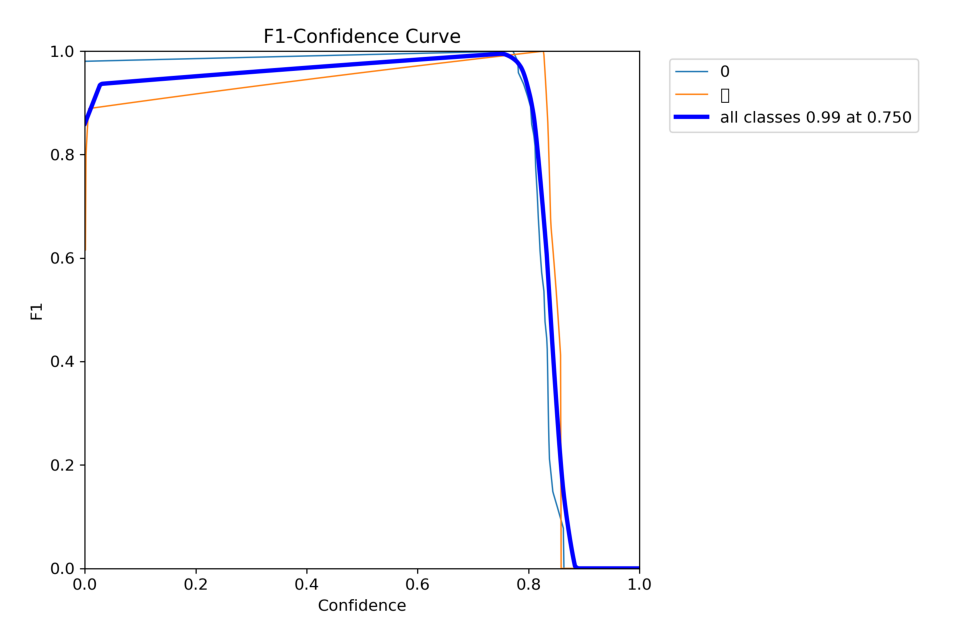

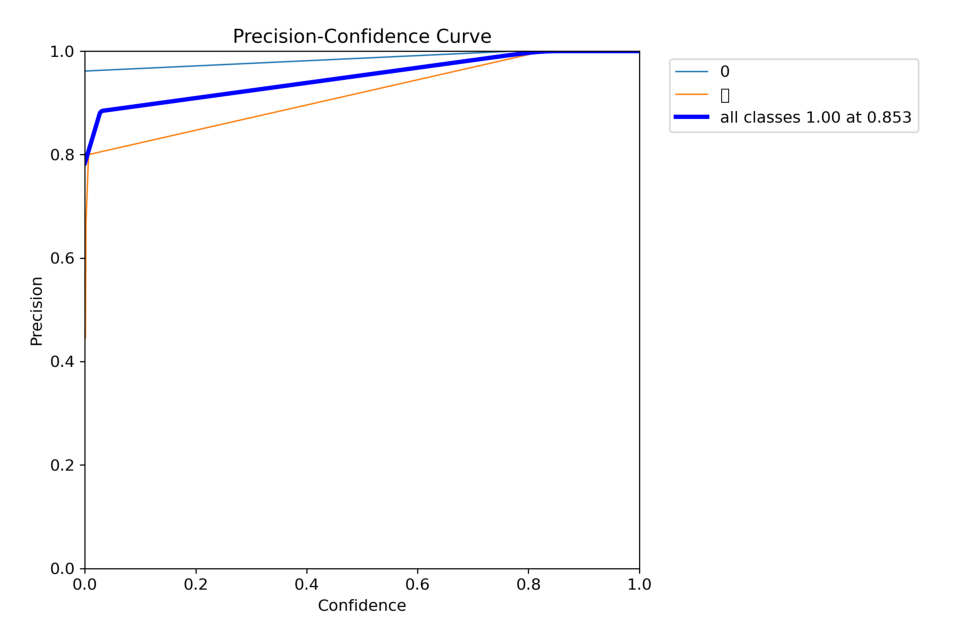

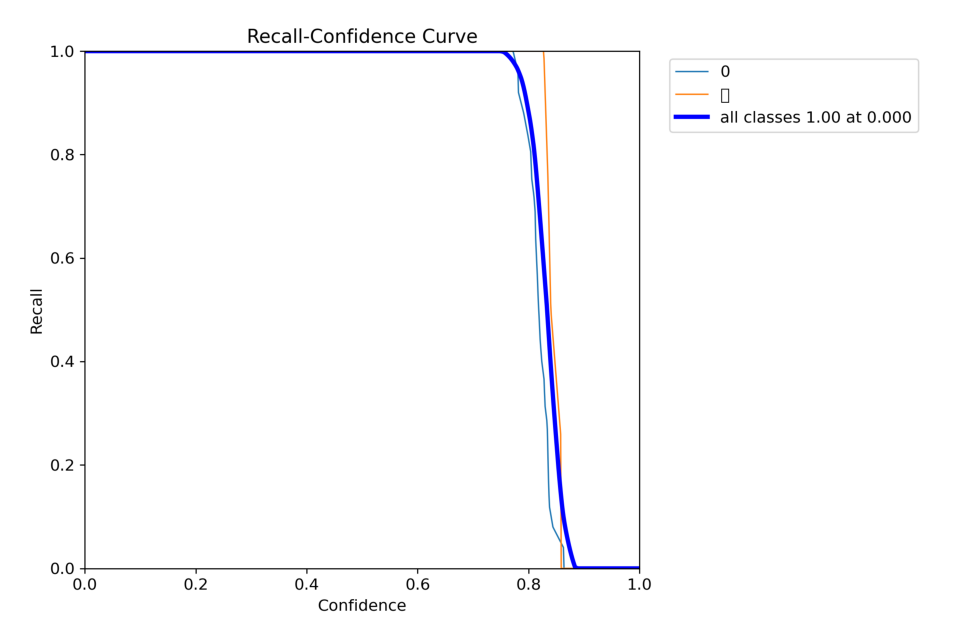

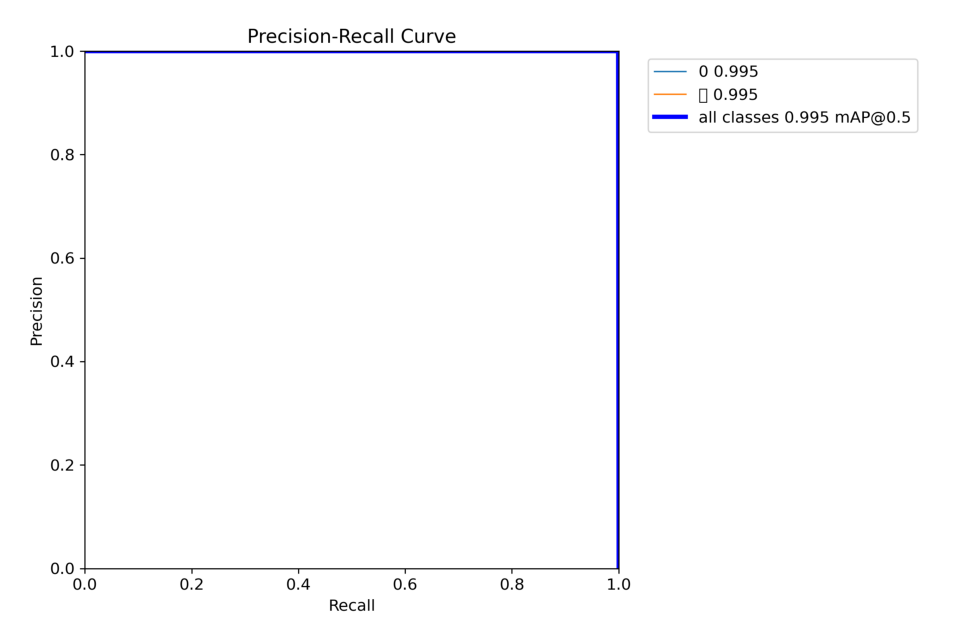

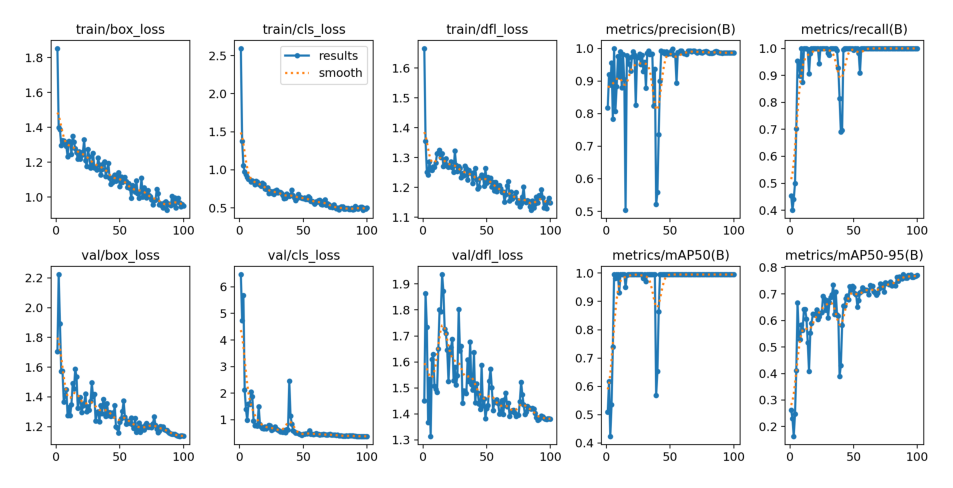

In [8]:
def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]


post_training_files_path = '/kaggle/working/ASL/train'
display_images(post_training_files_path, image_files)

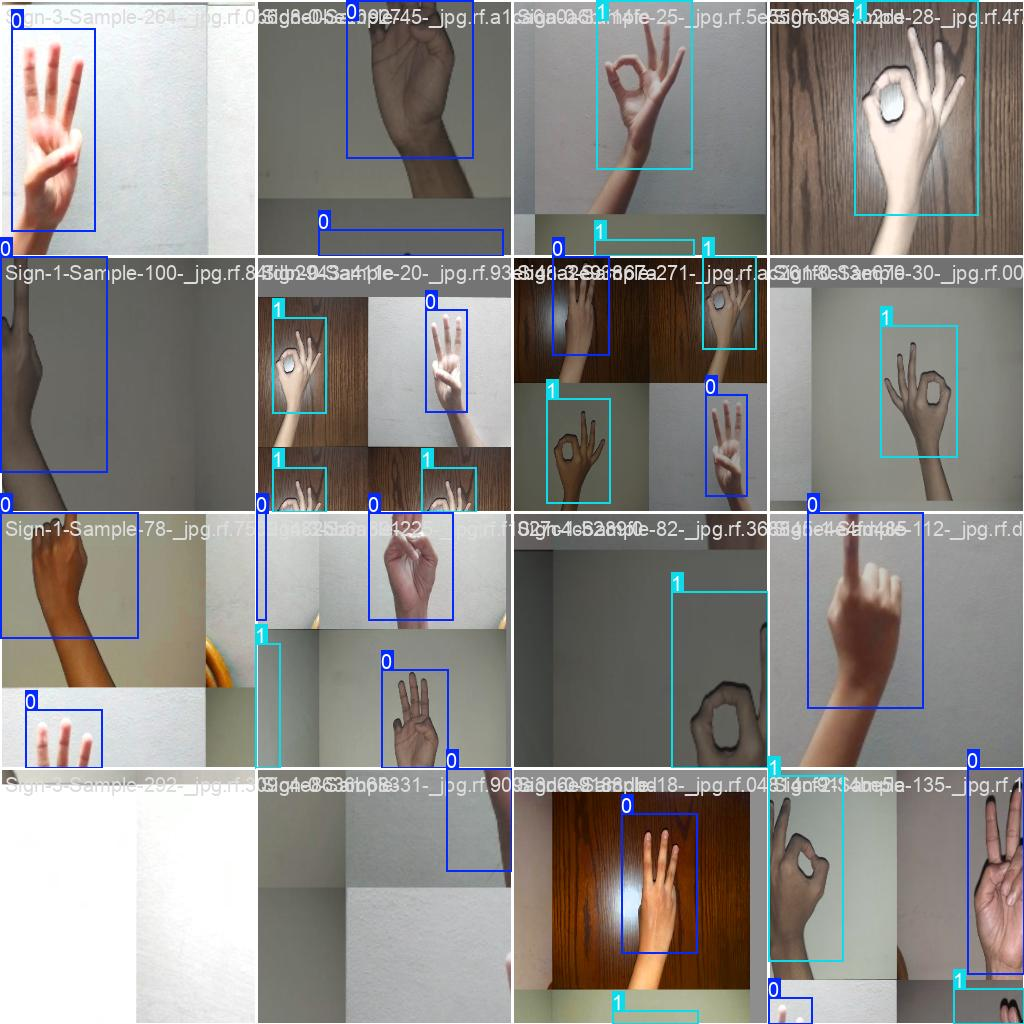

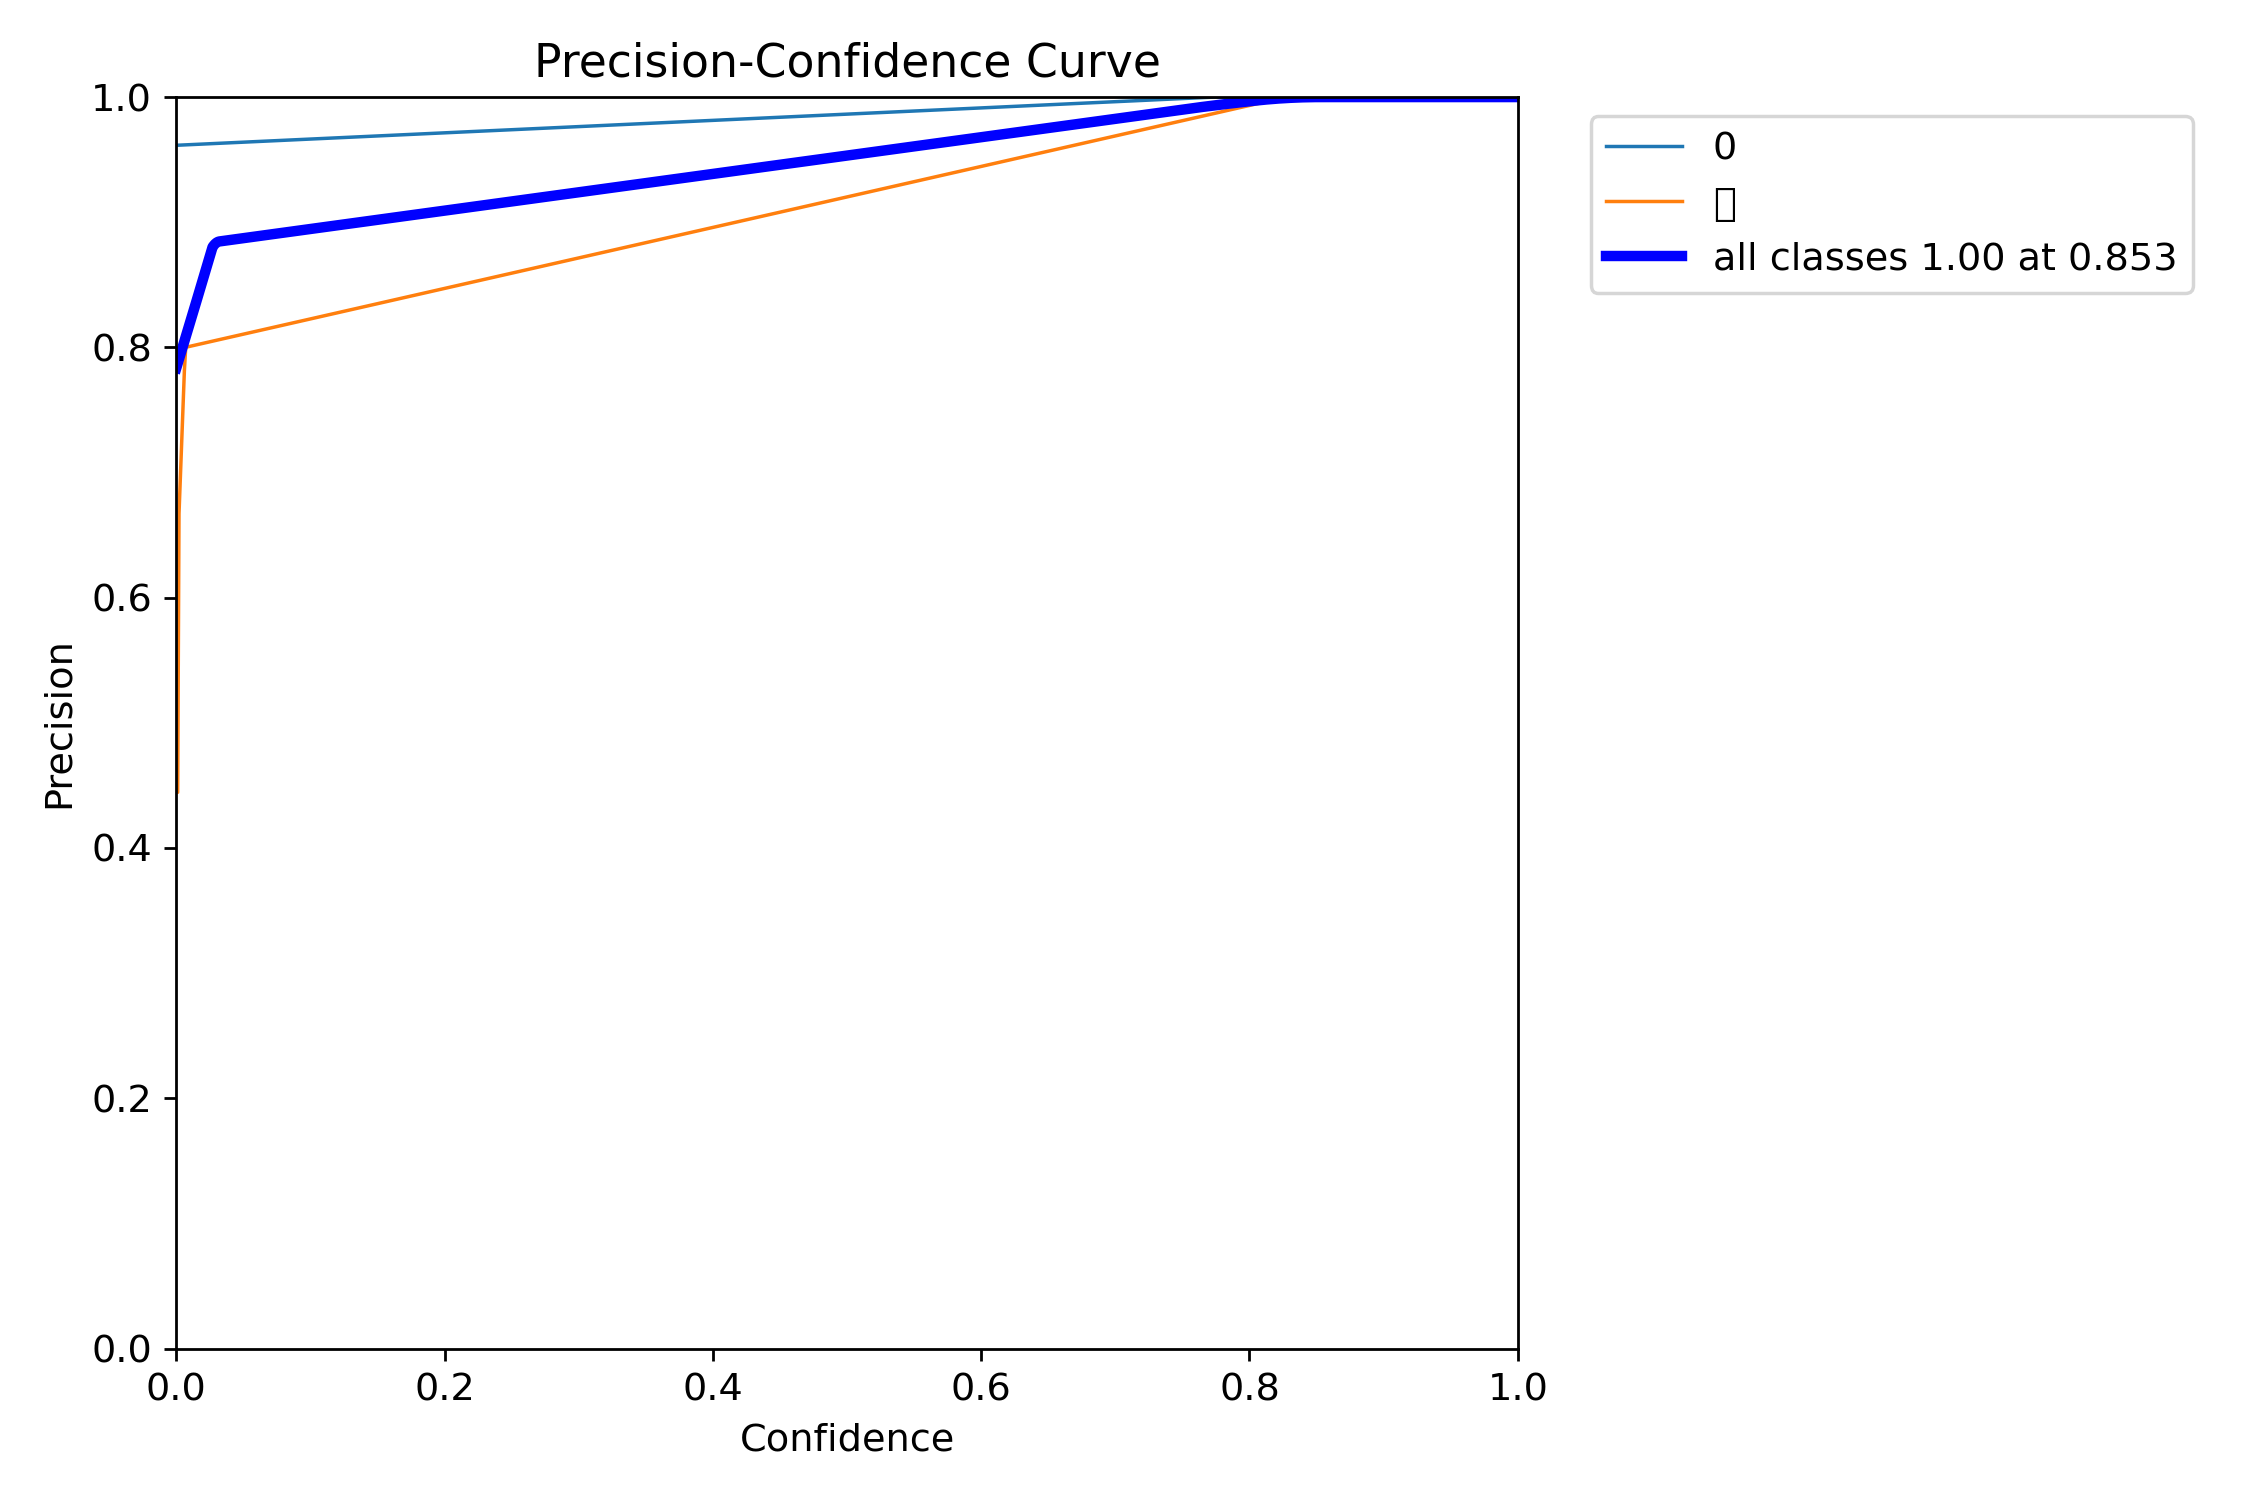

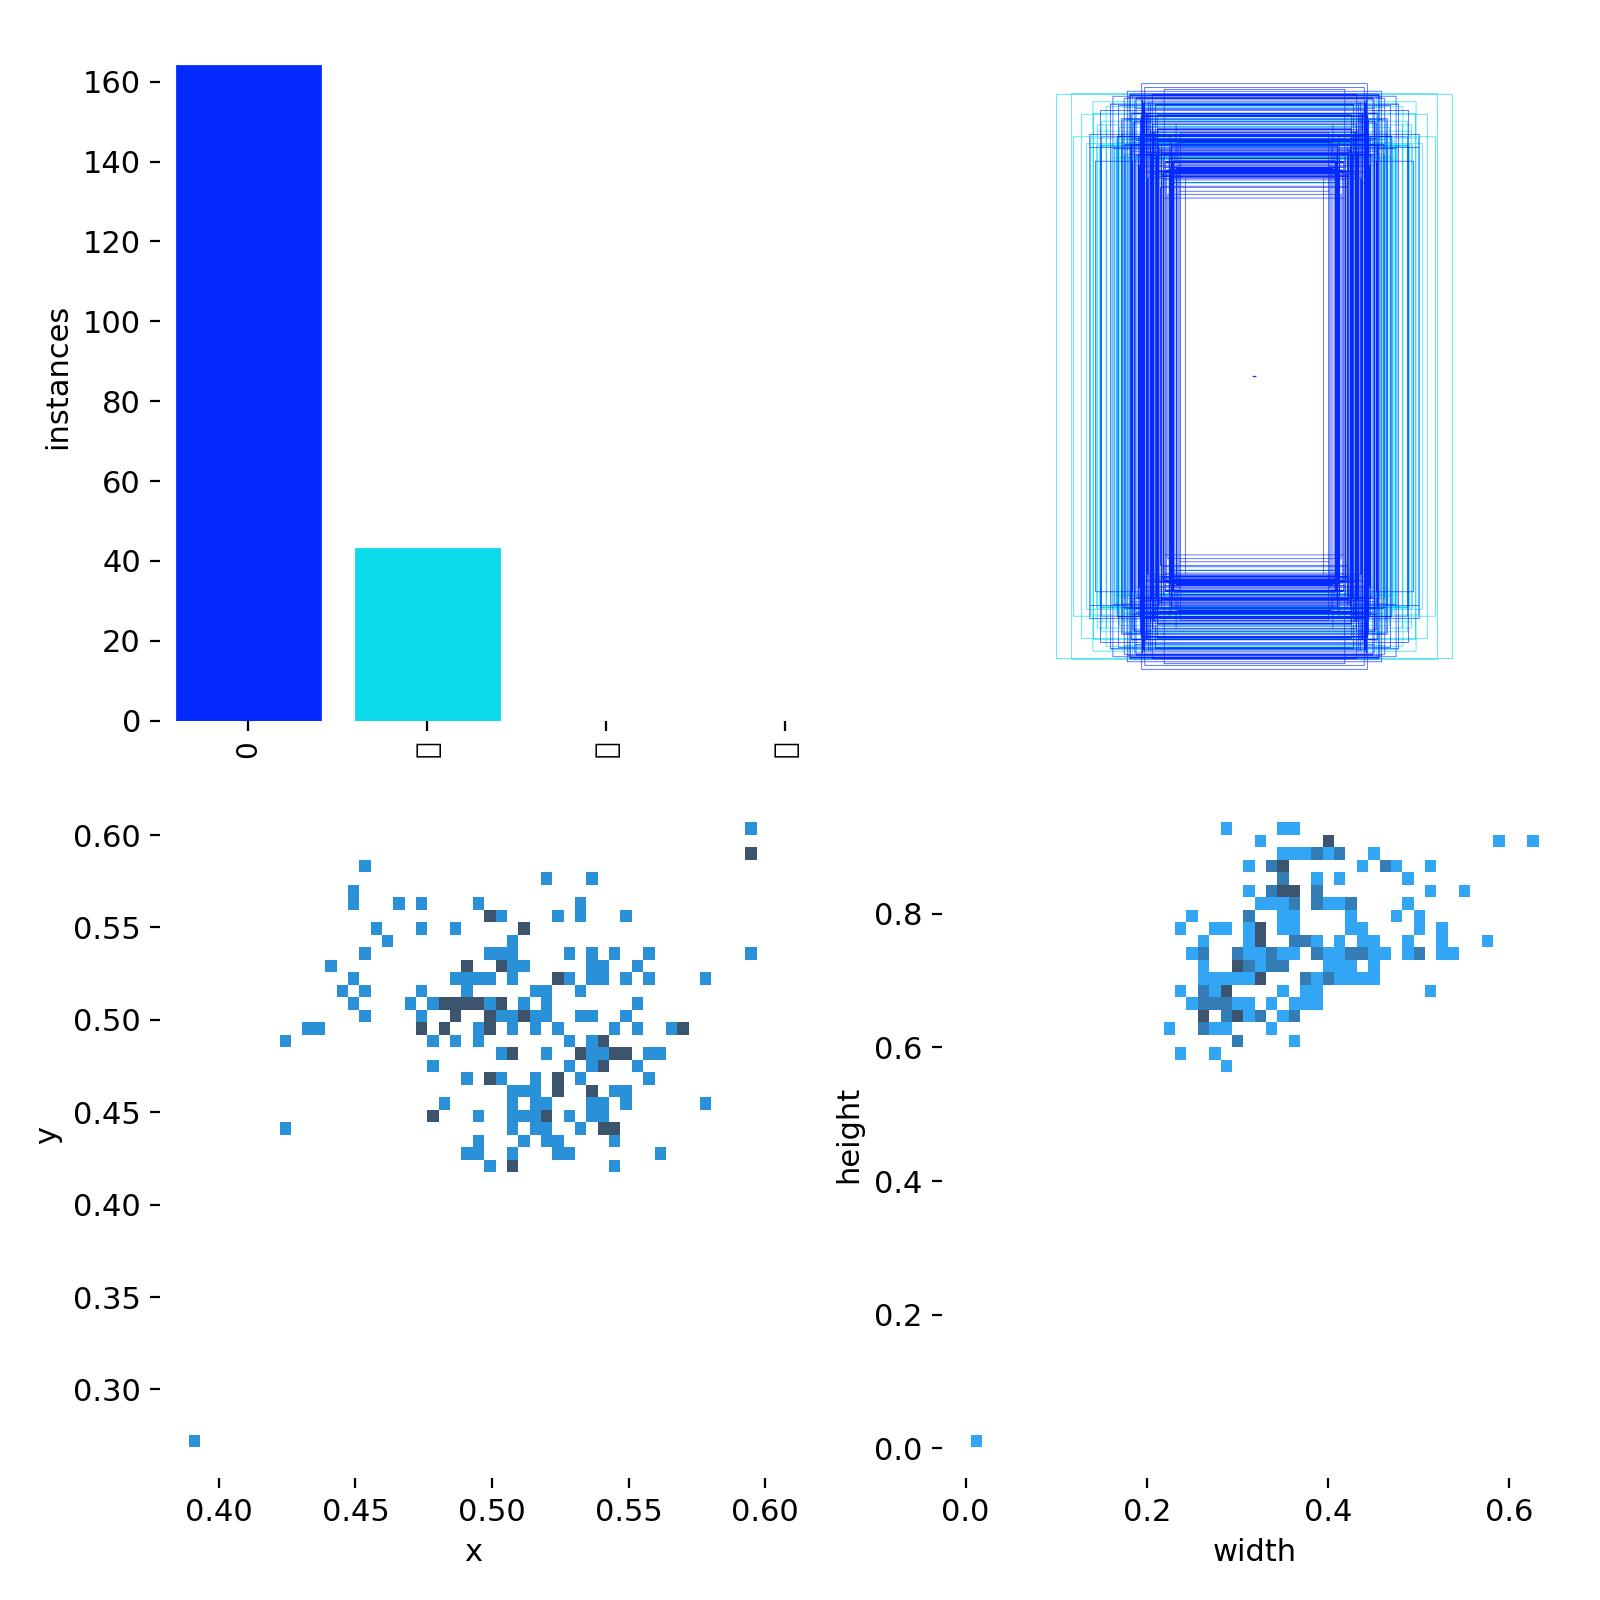

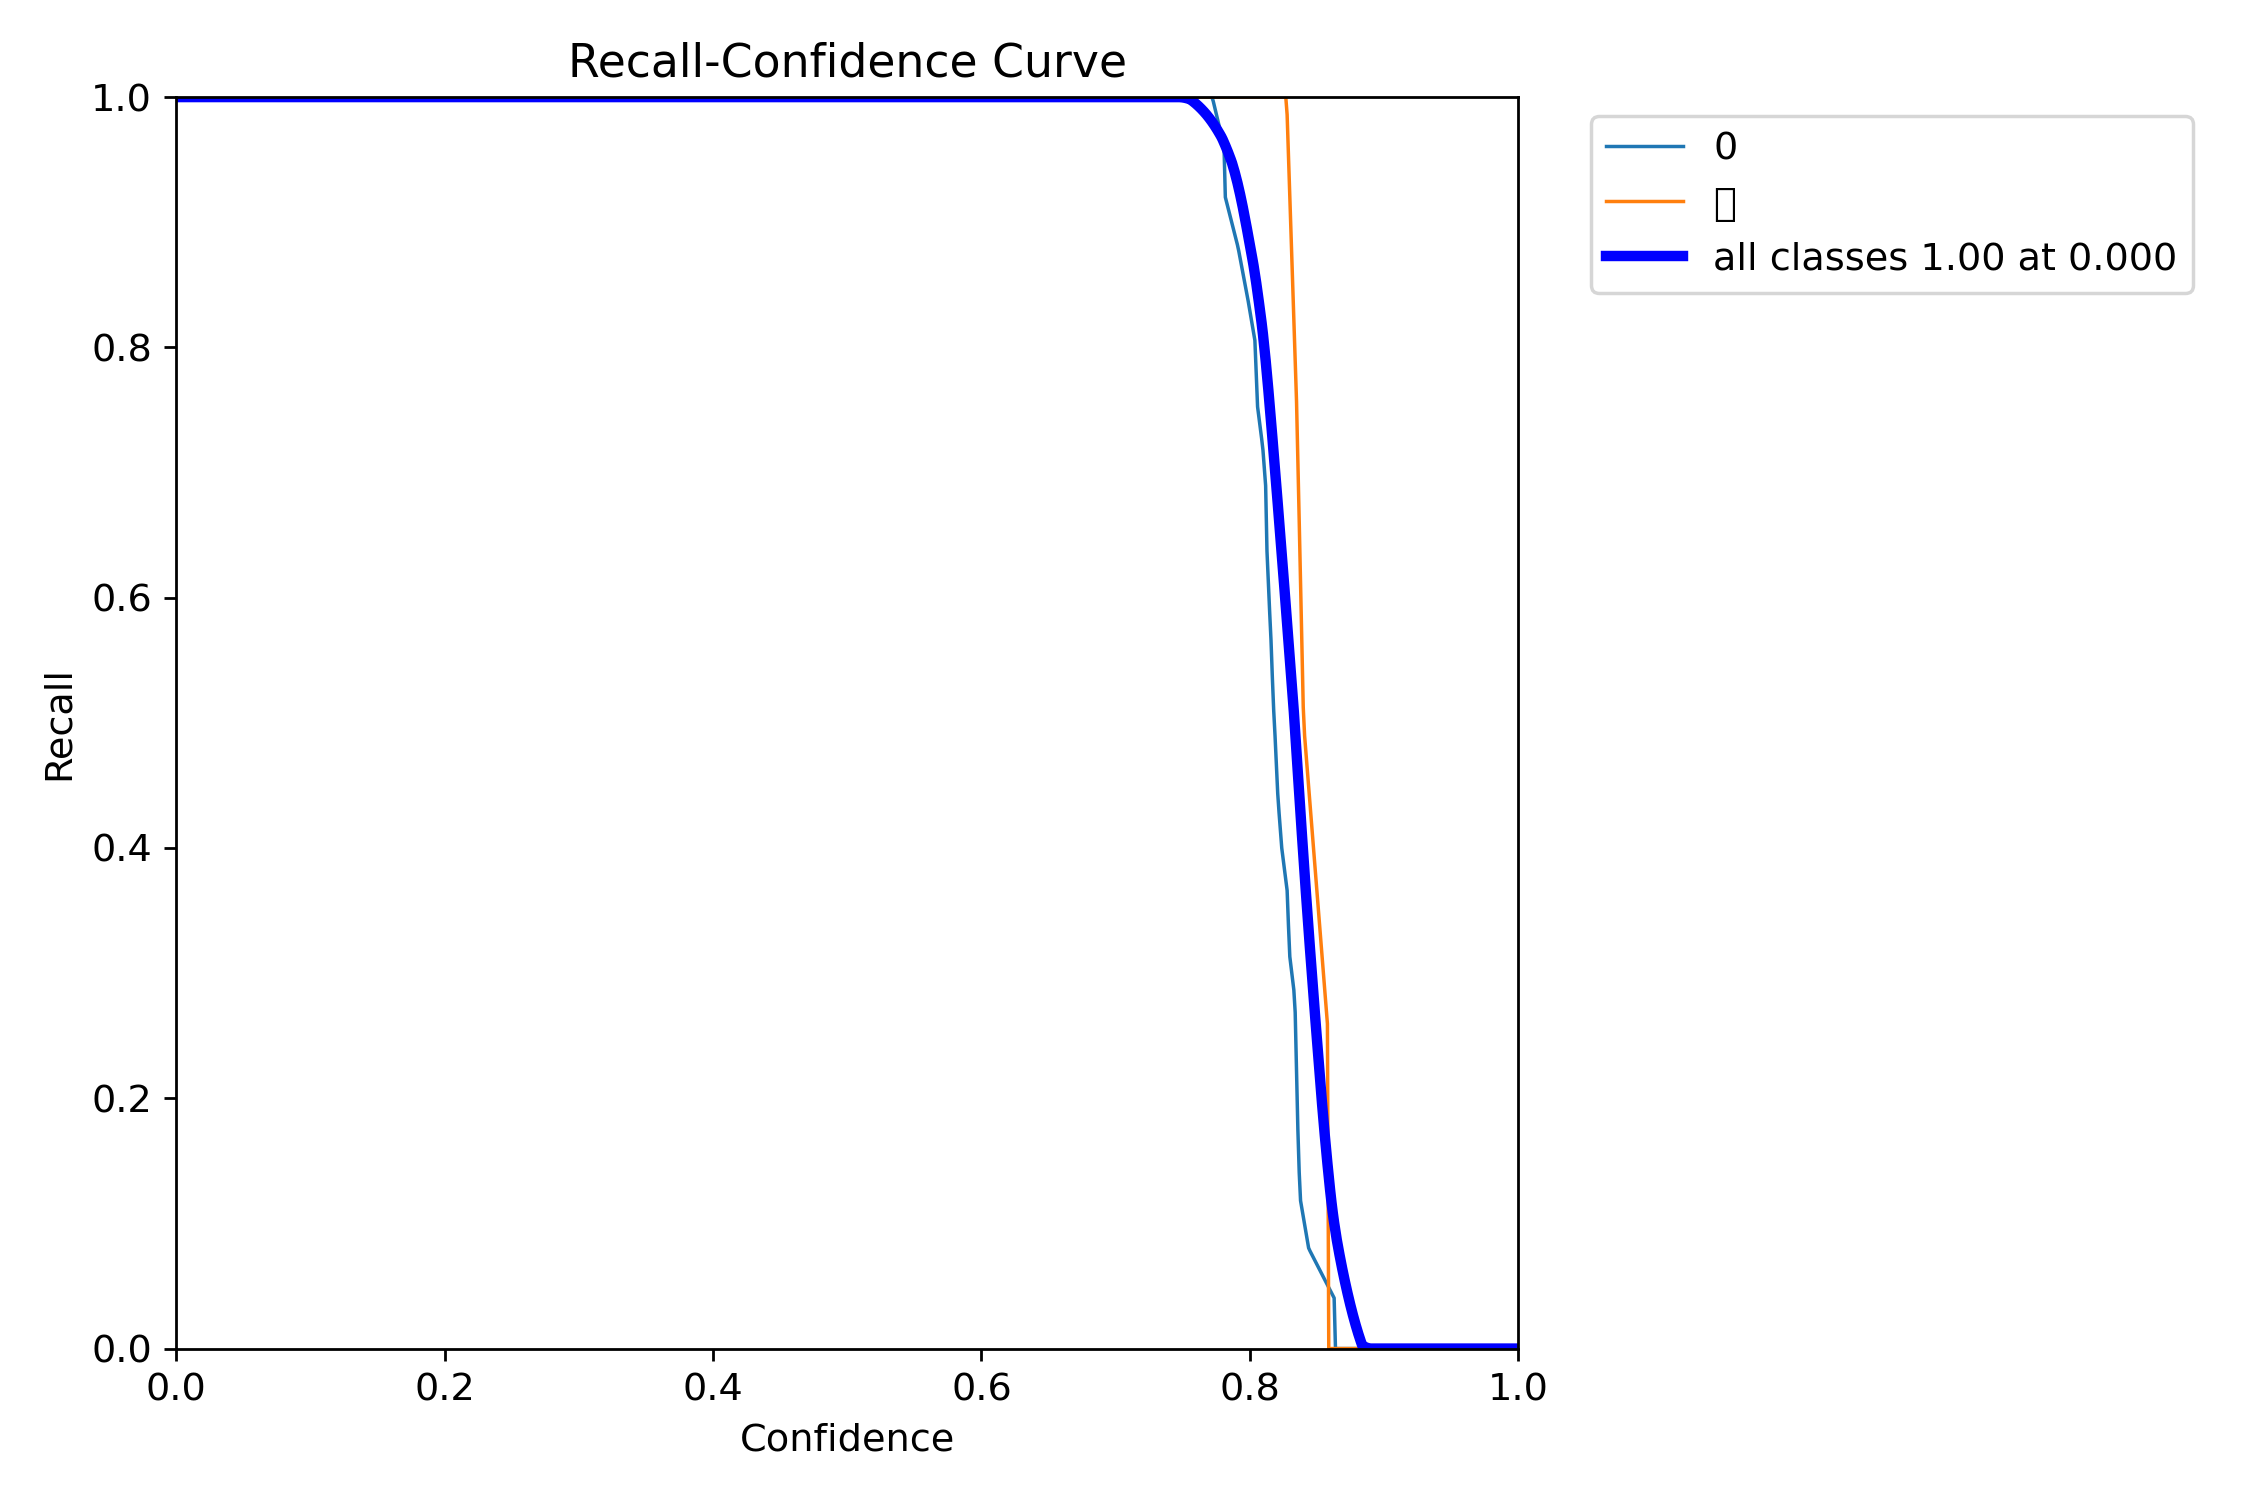

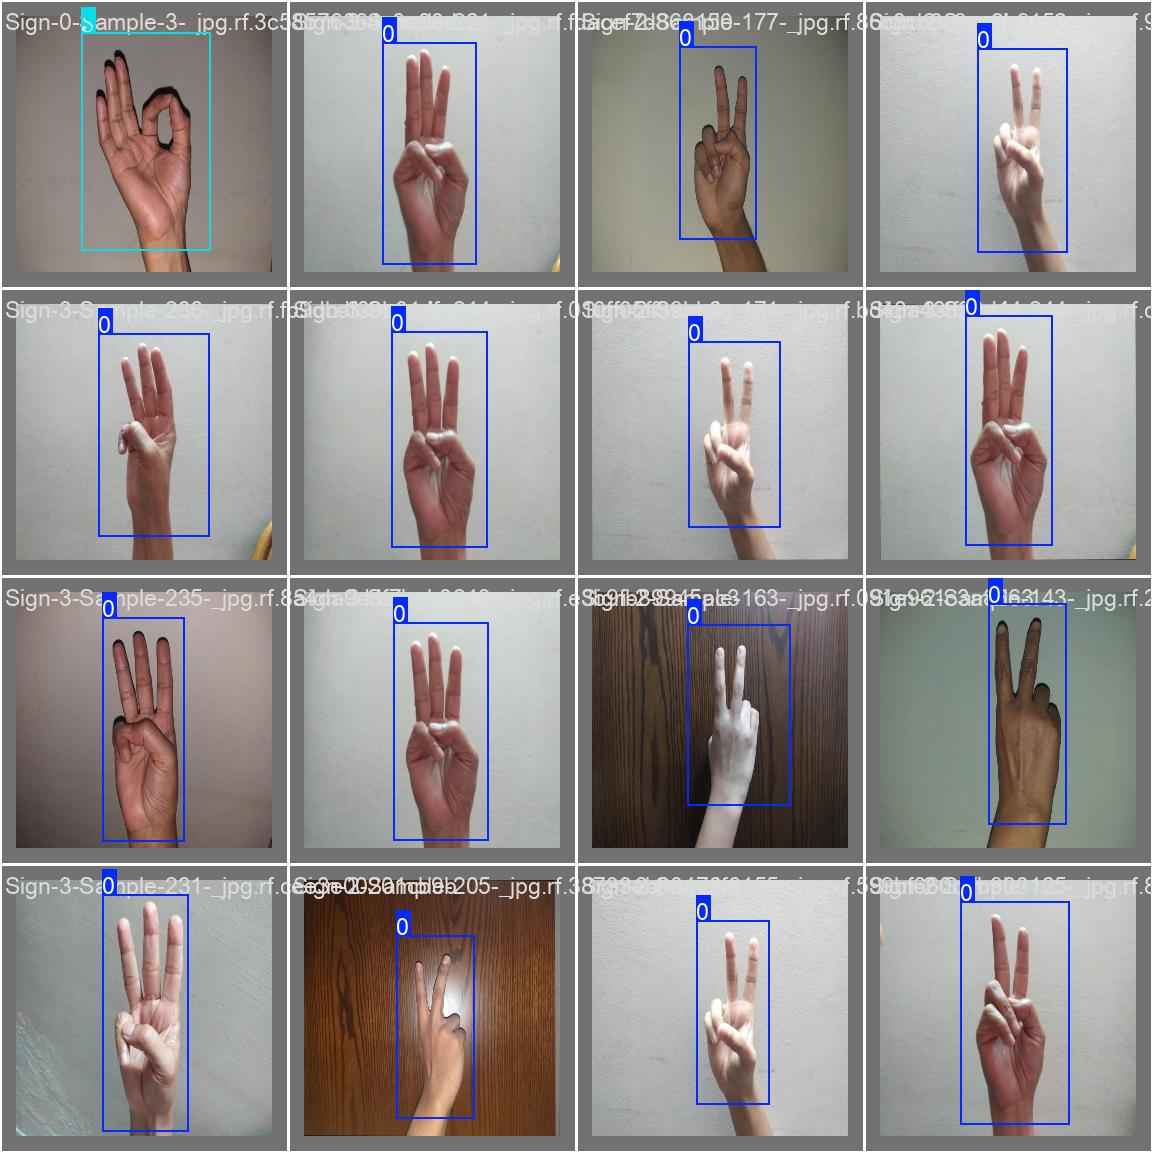

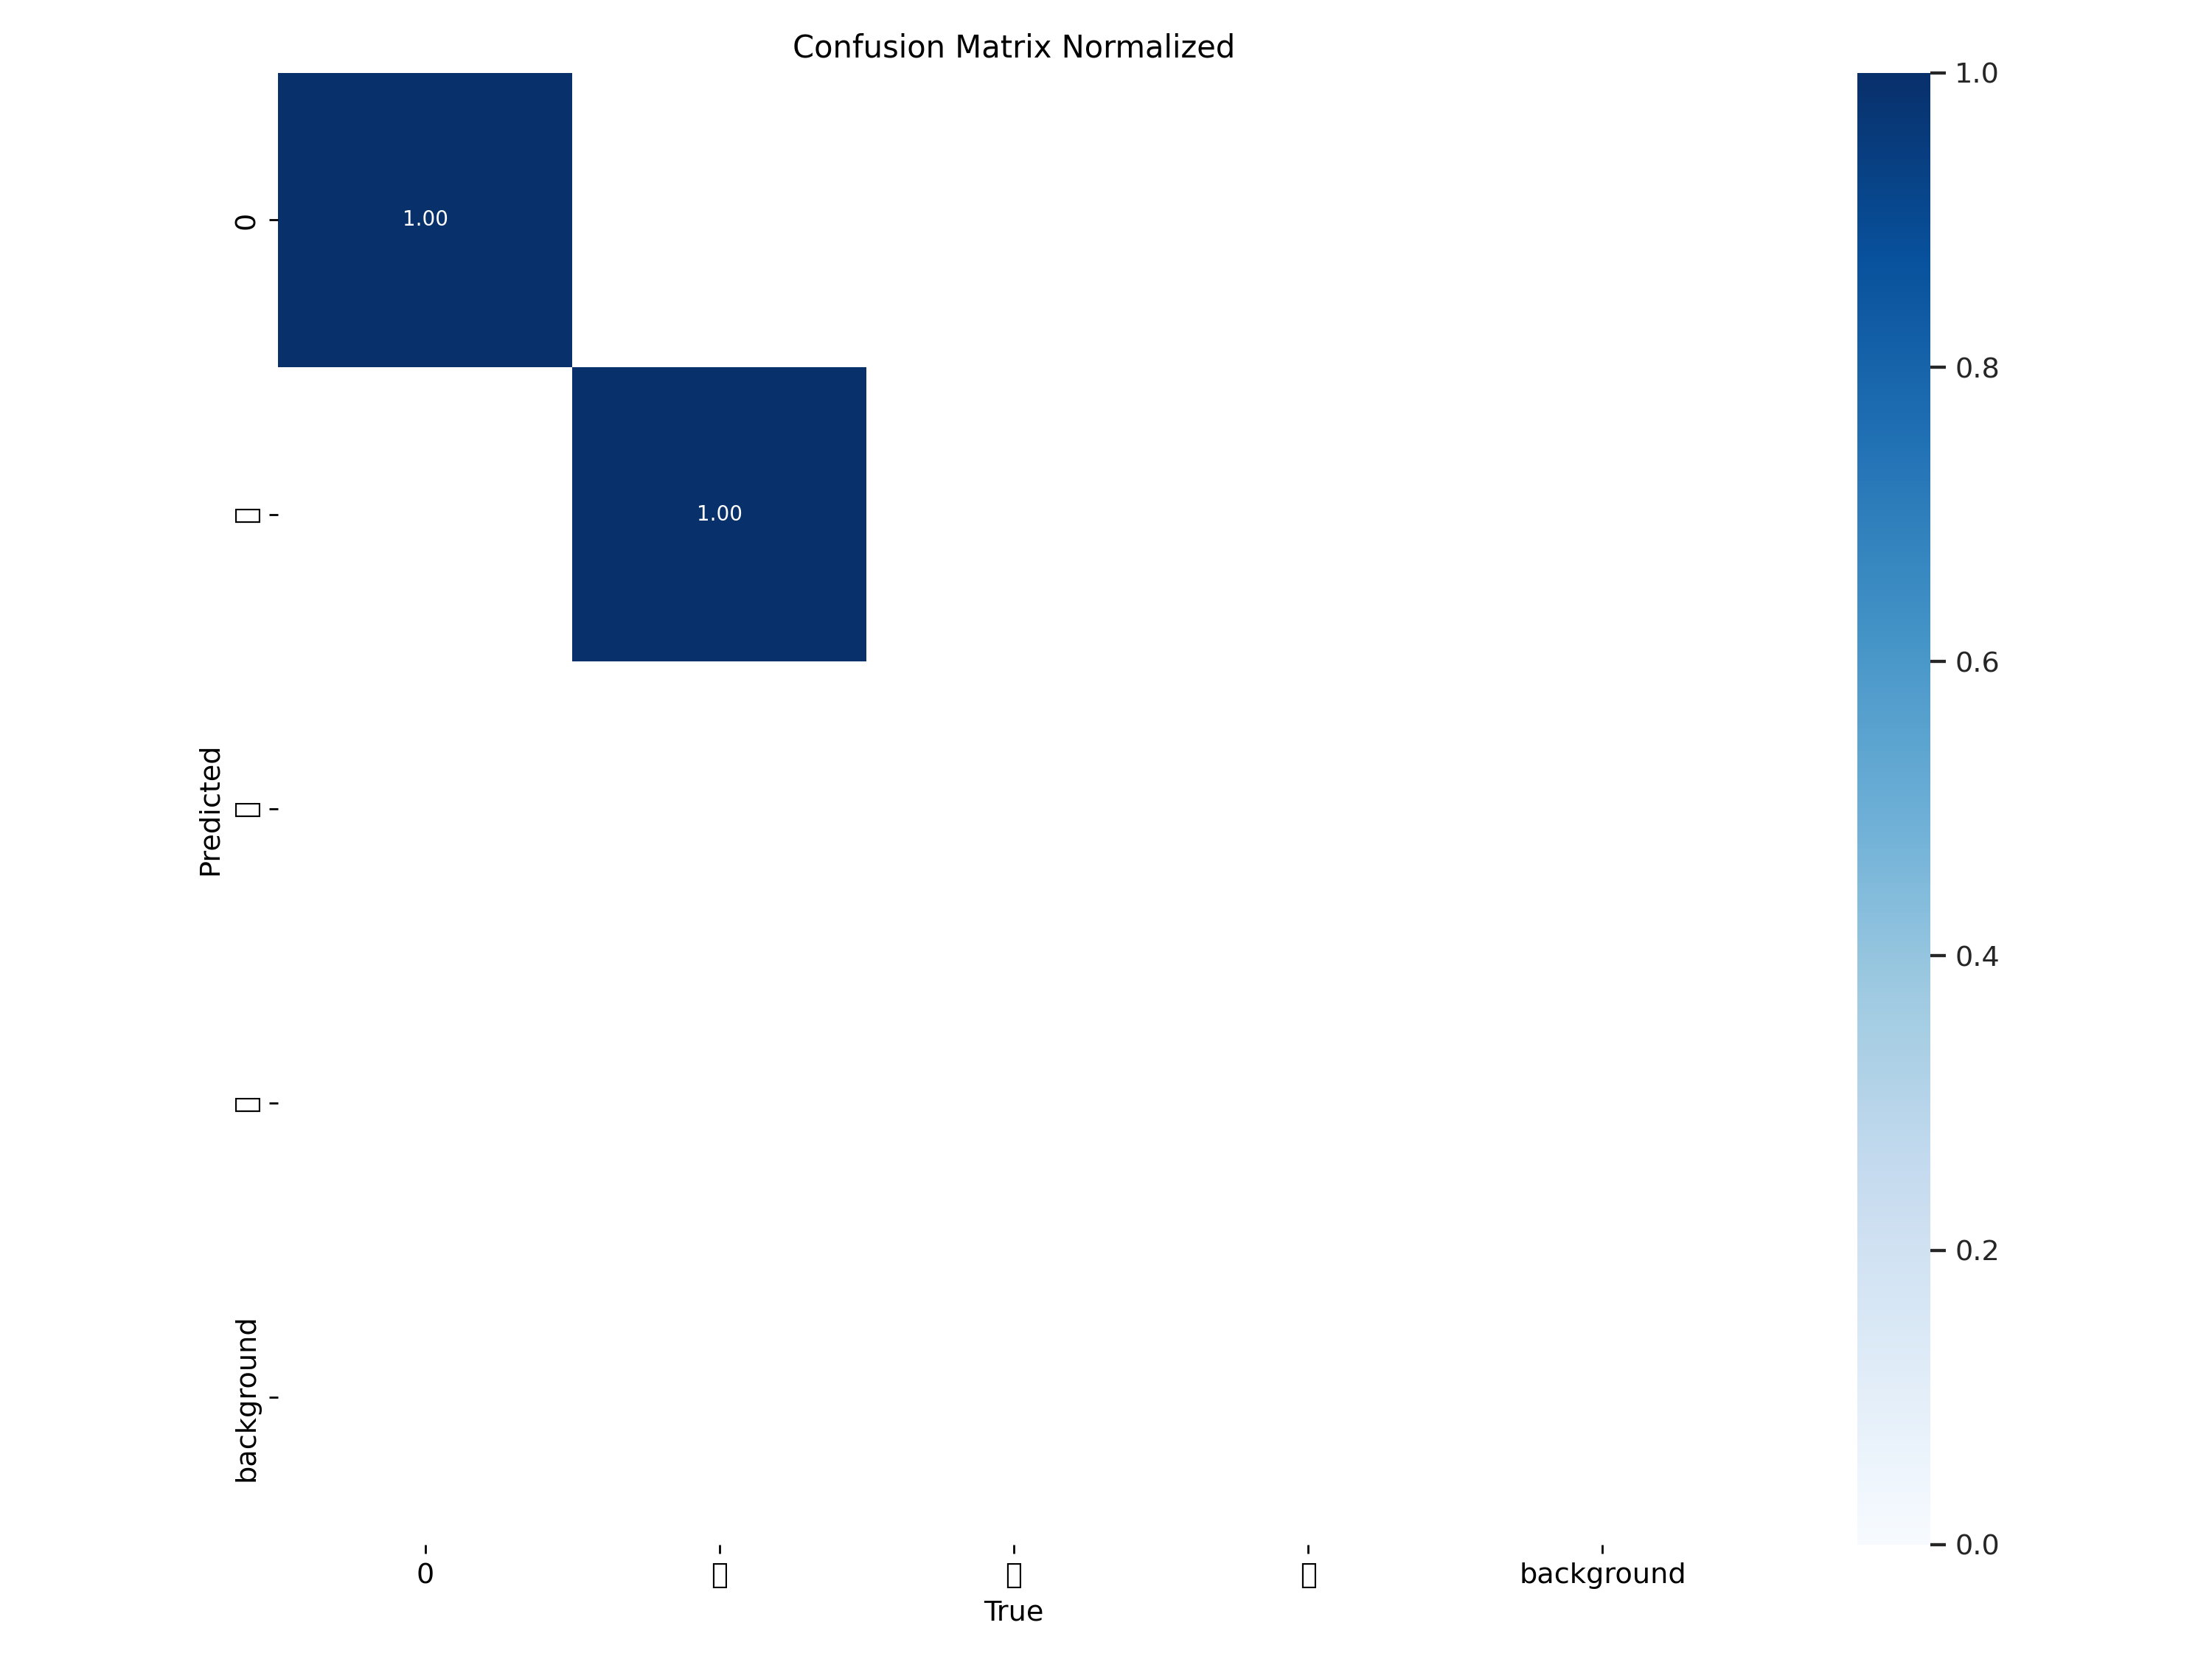

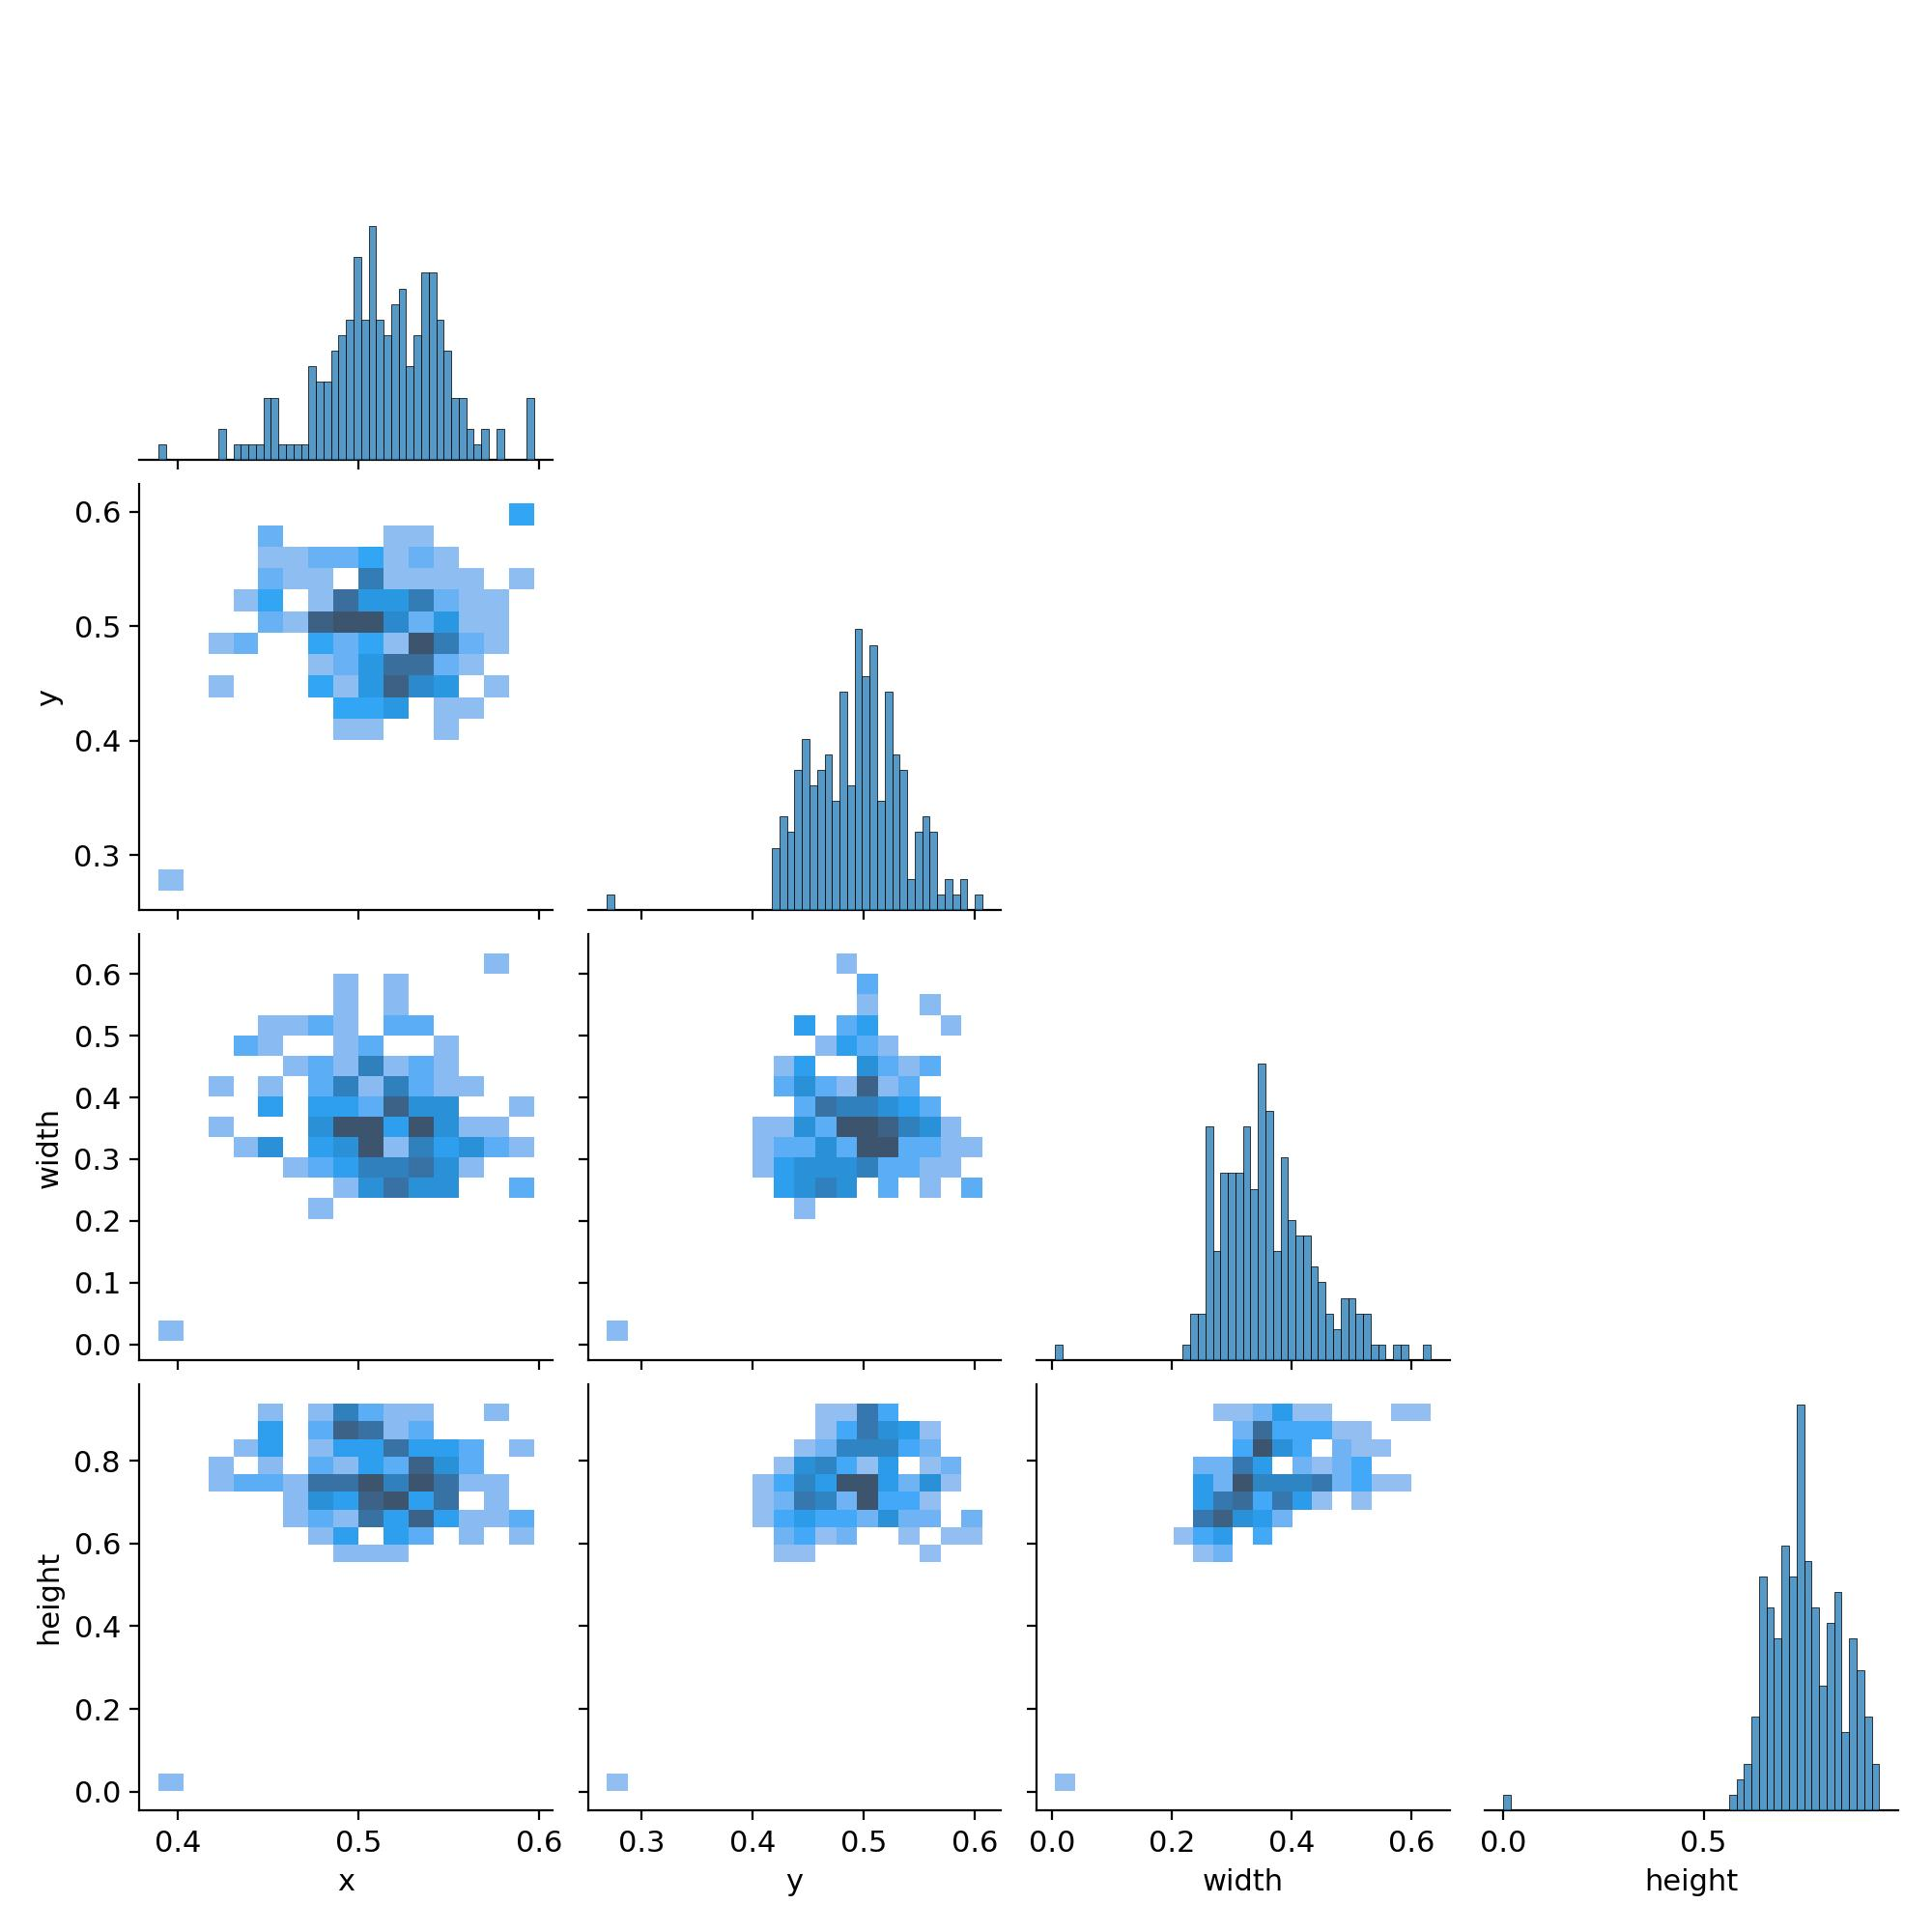

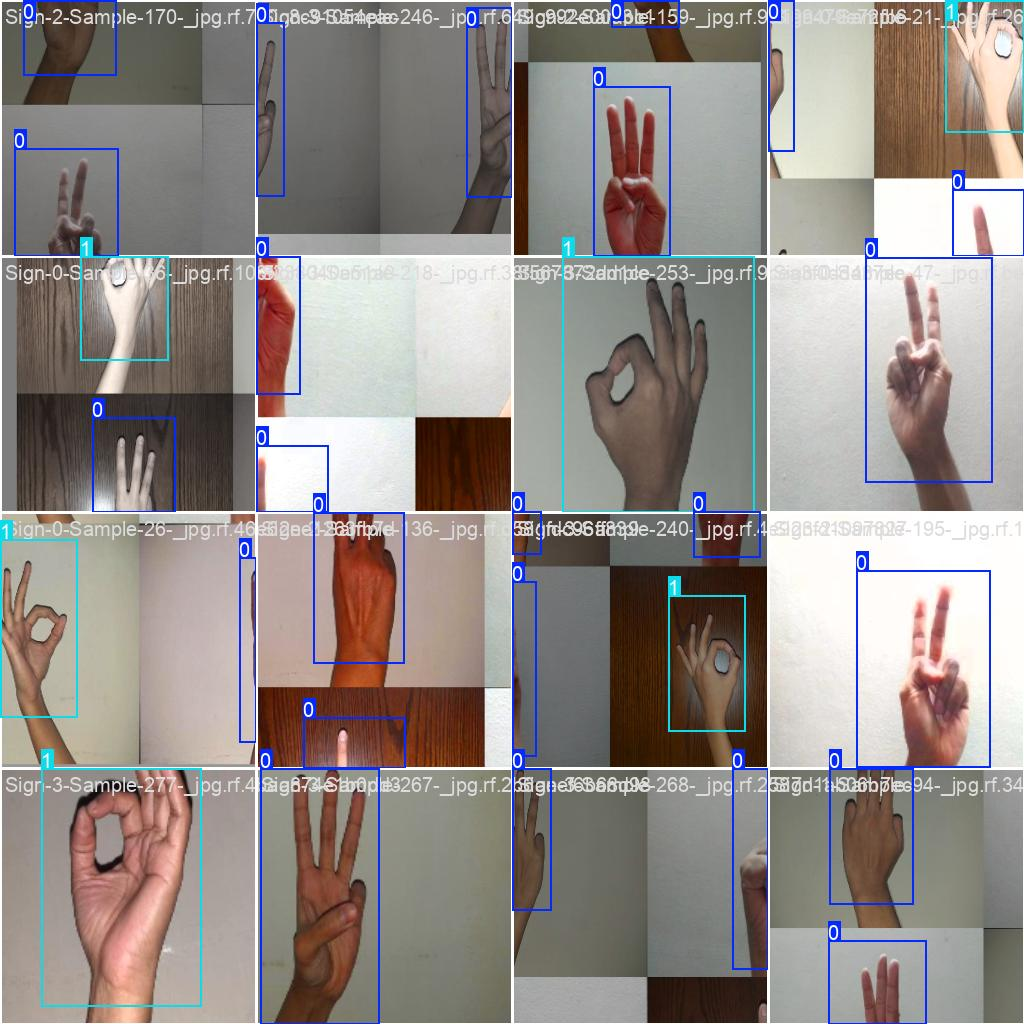

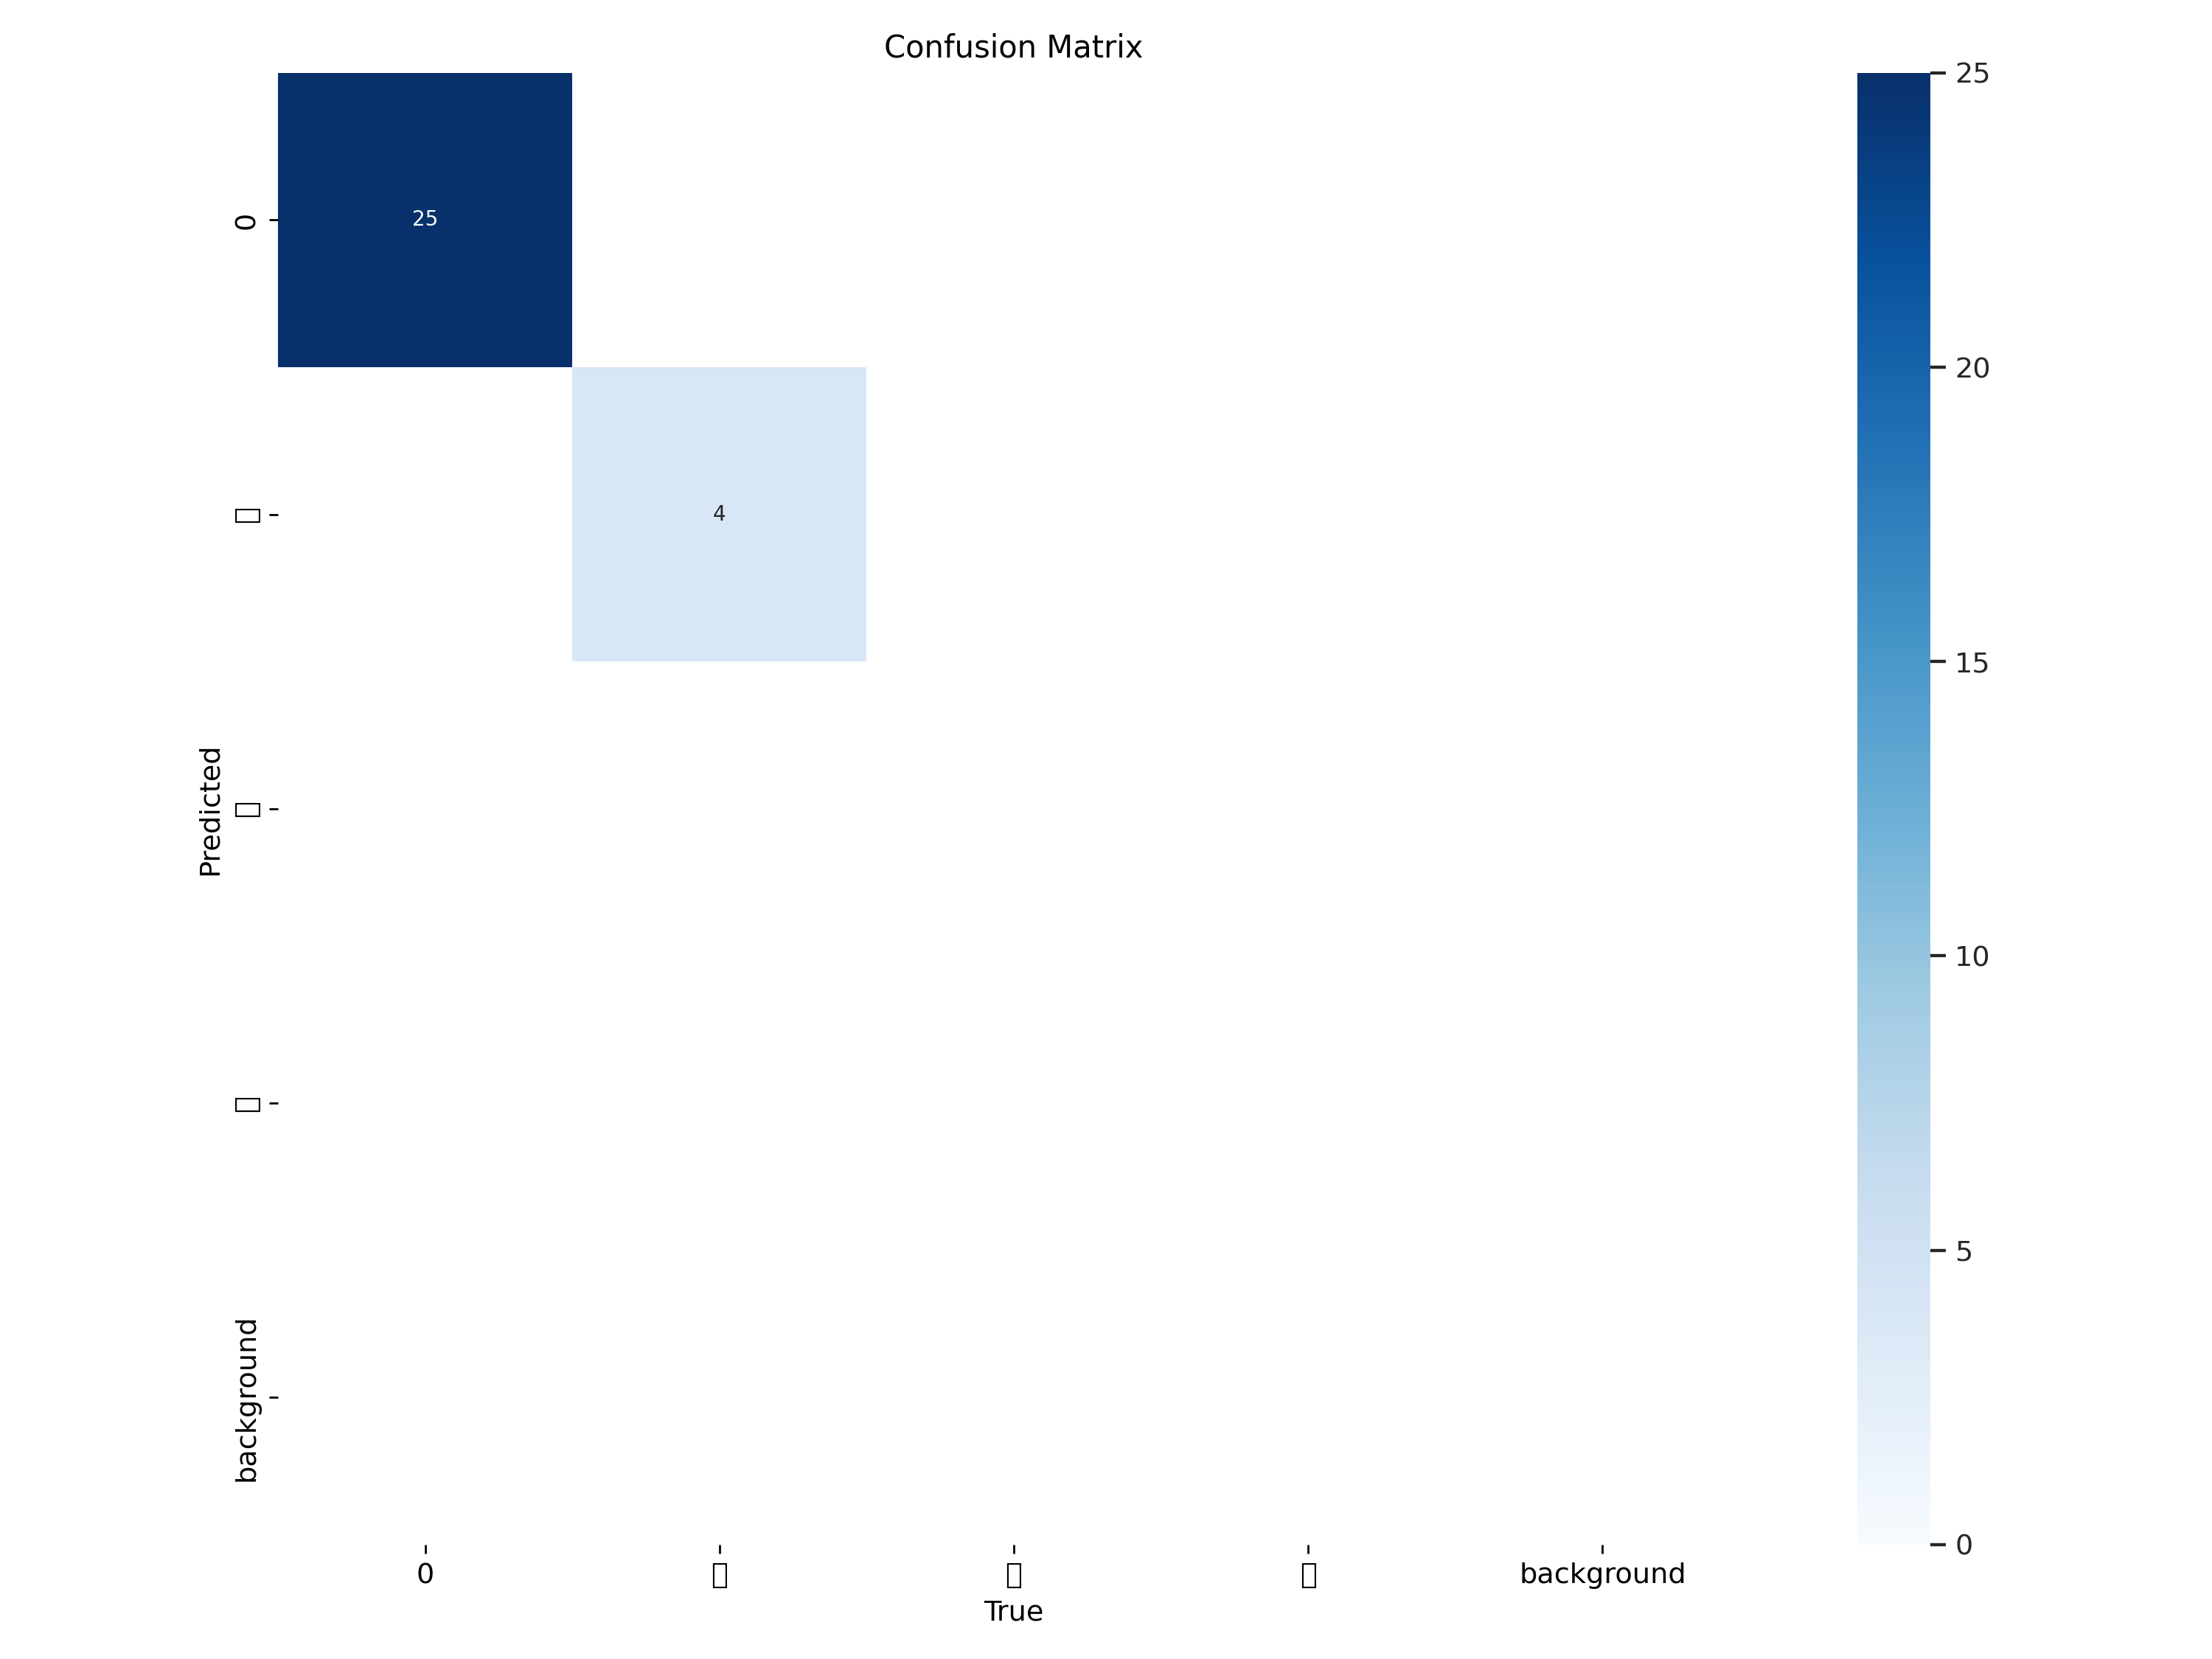

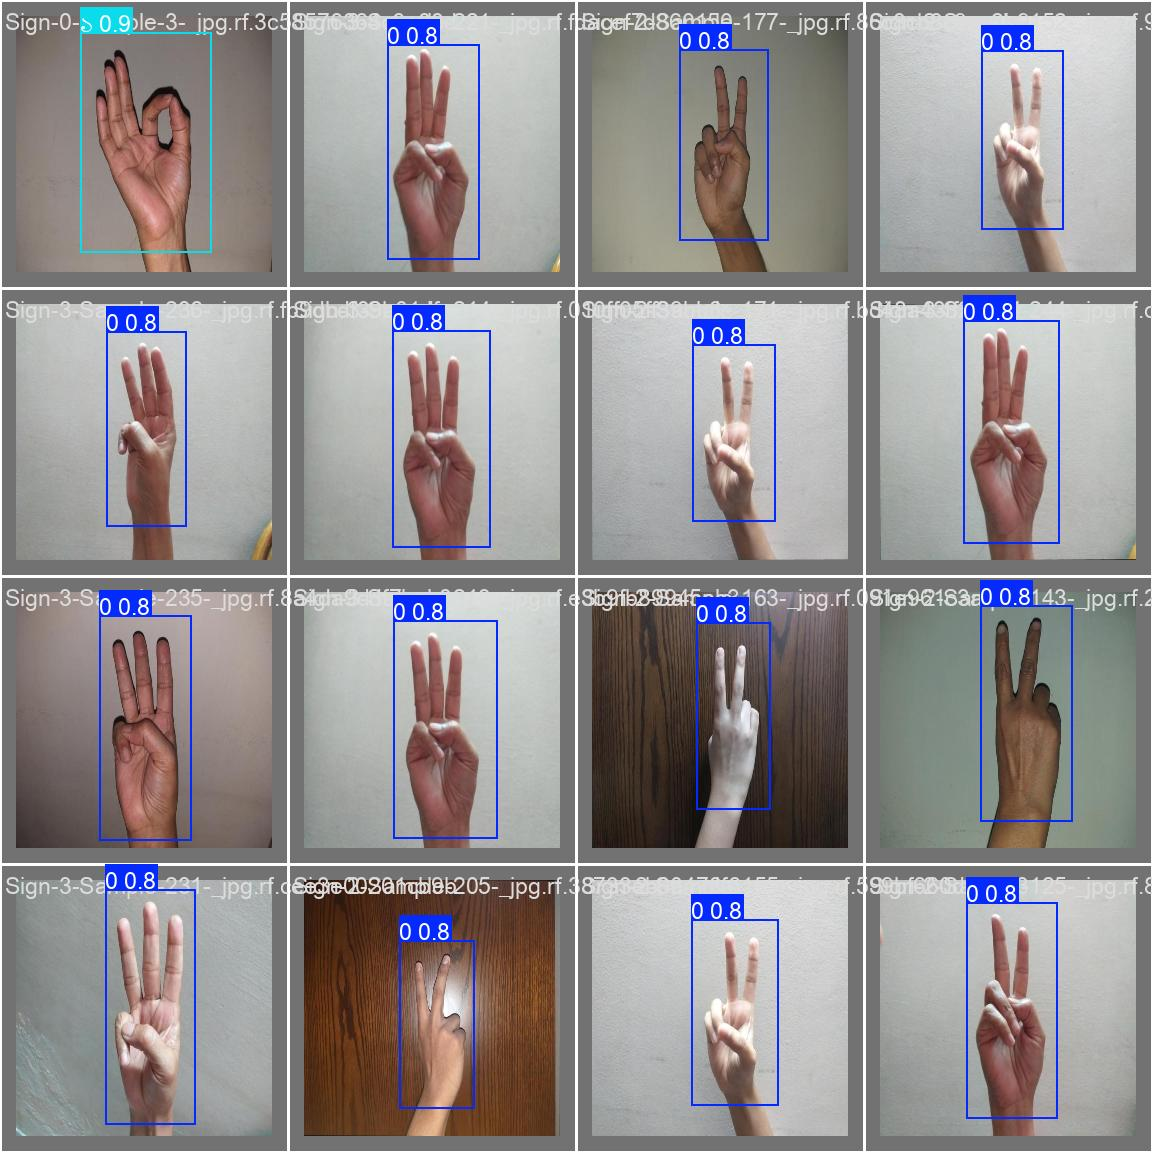

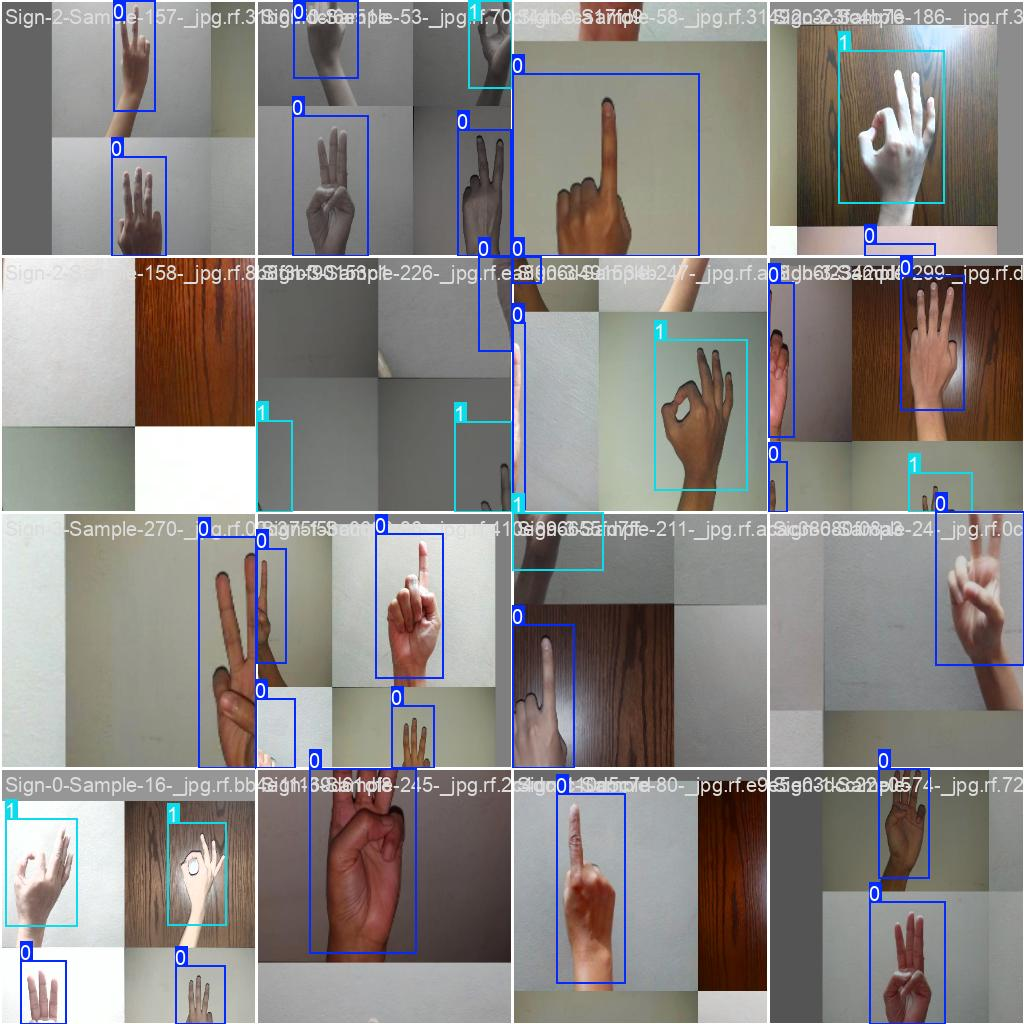

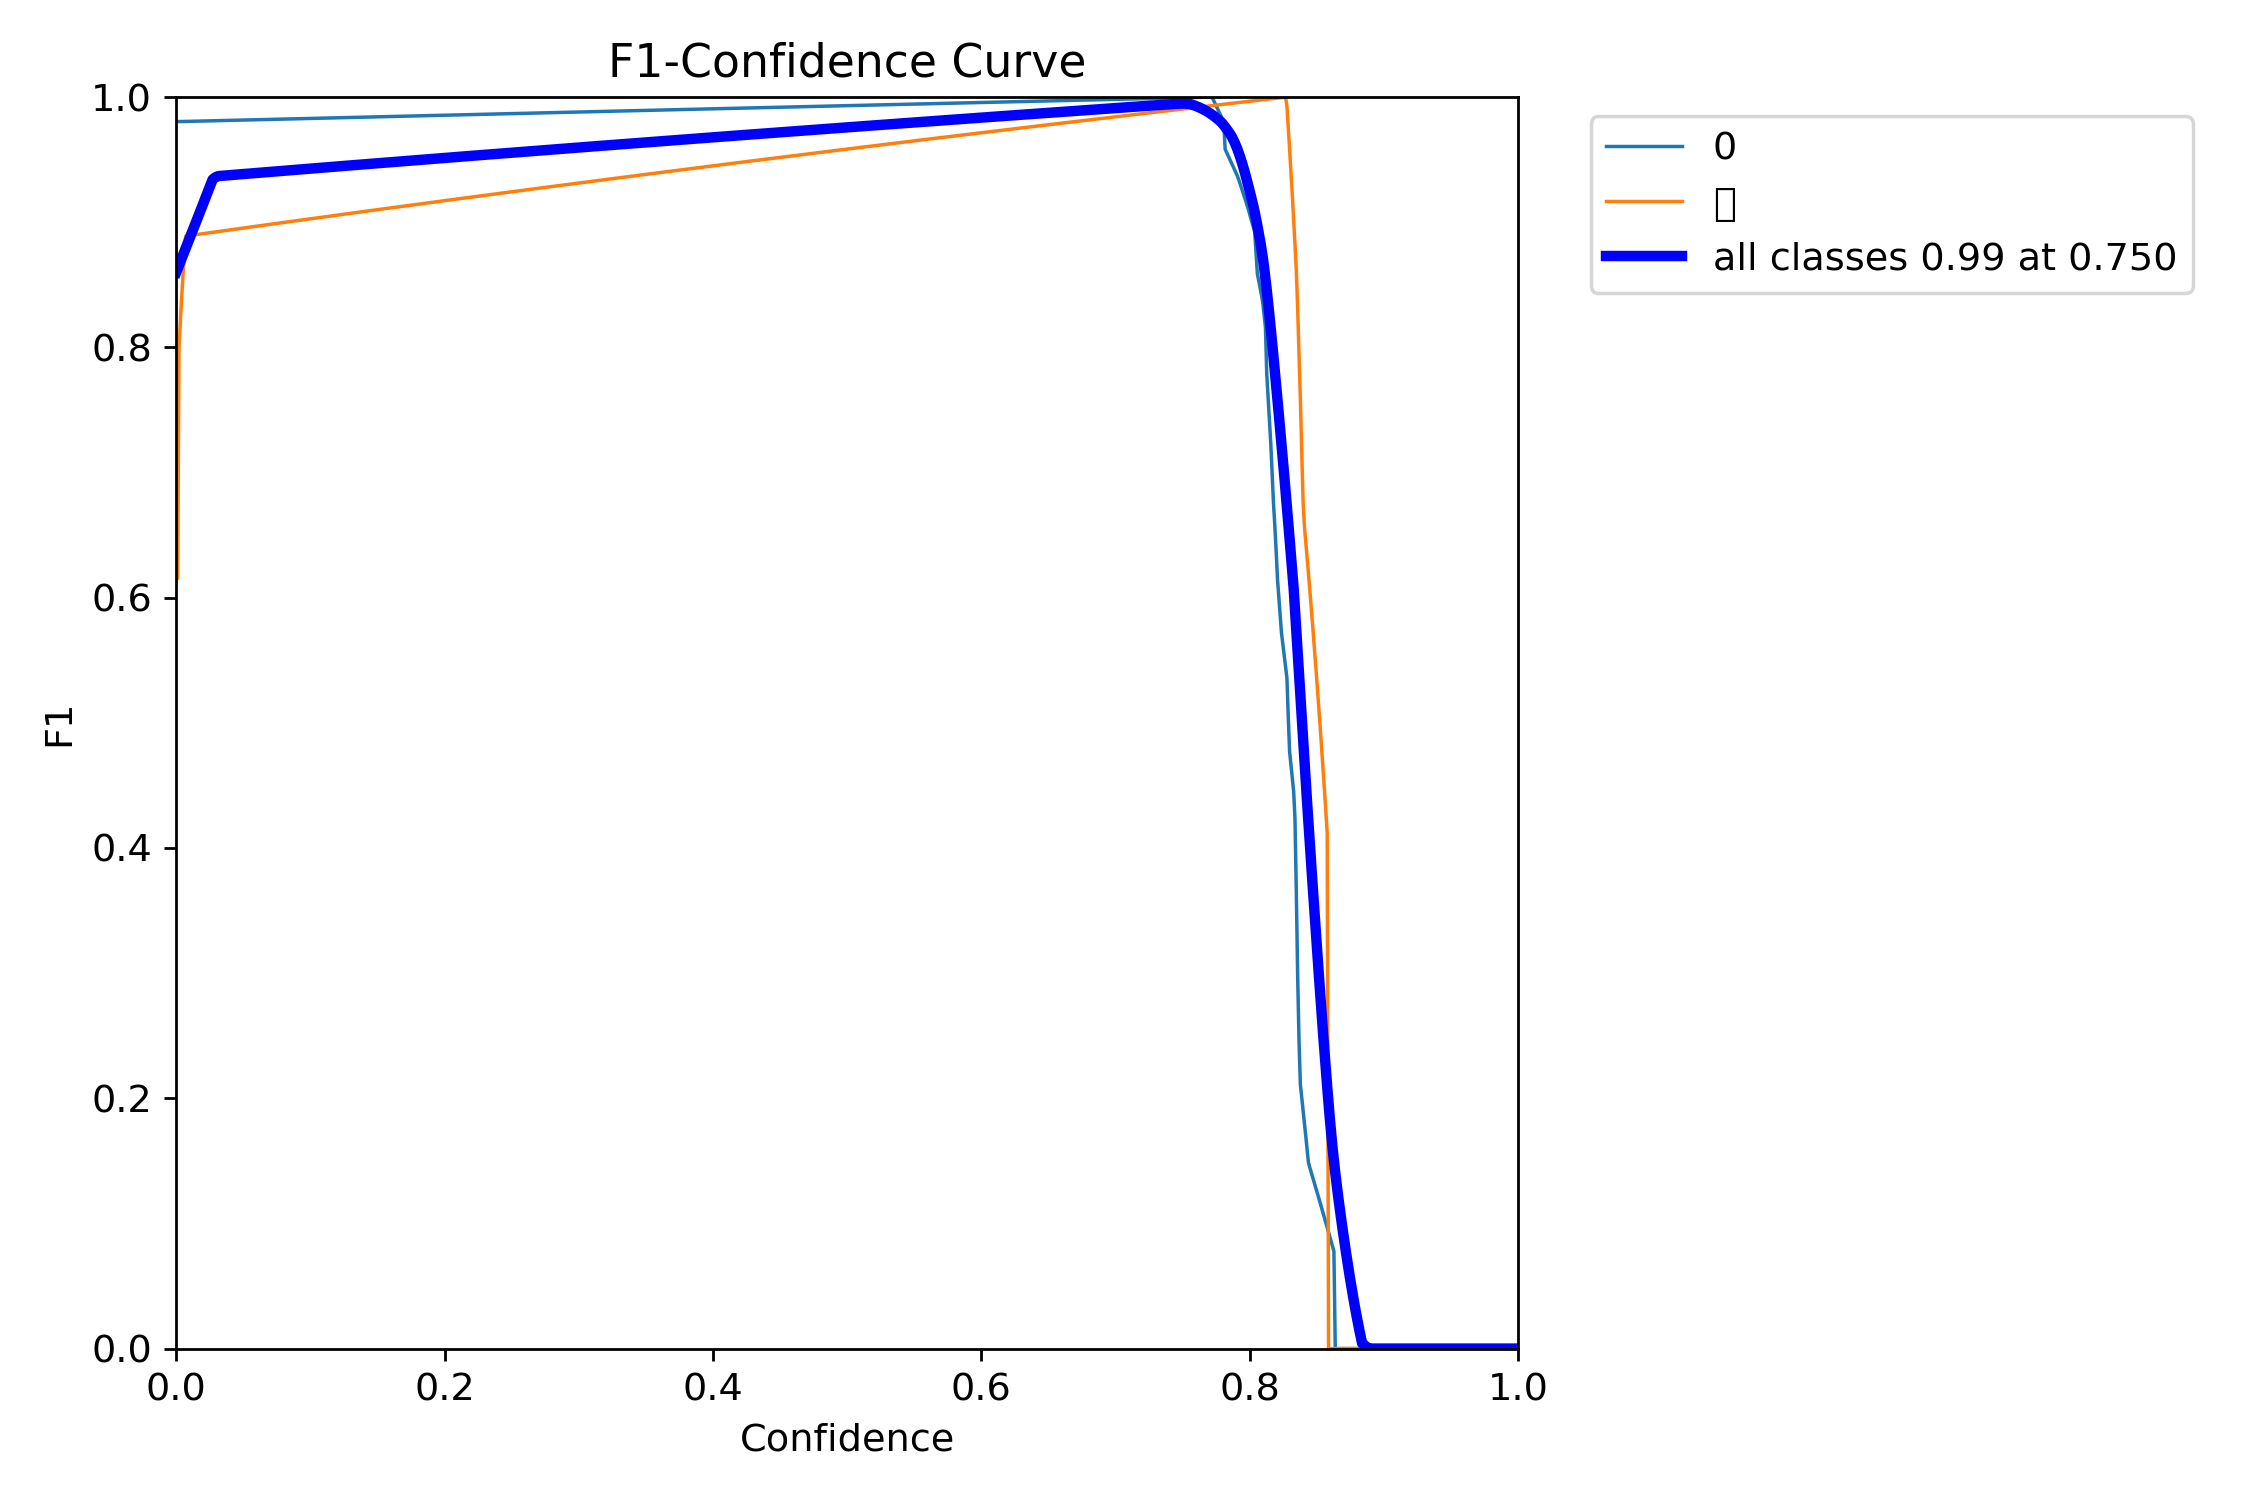

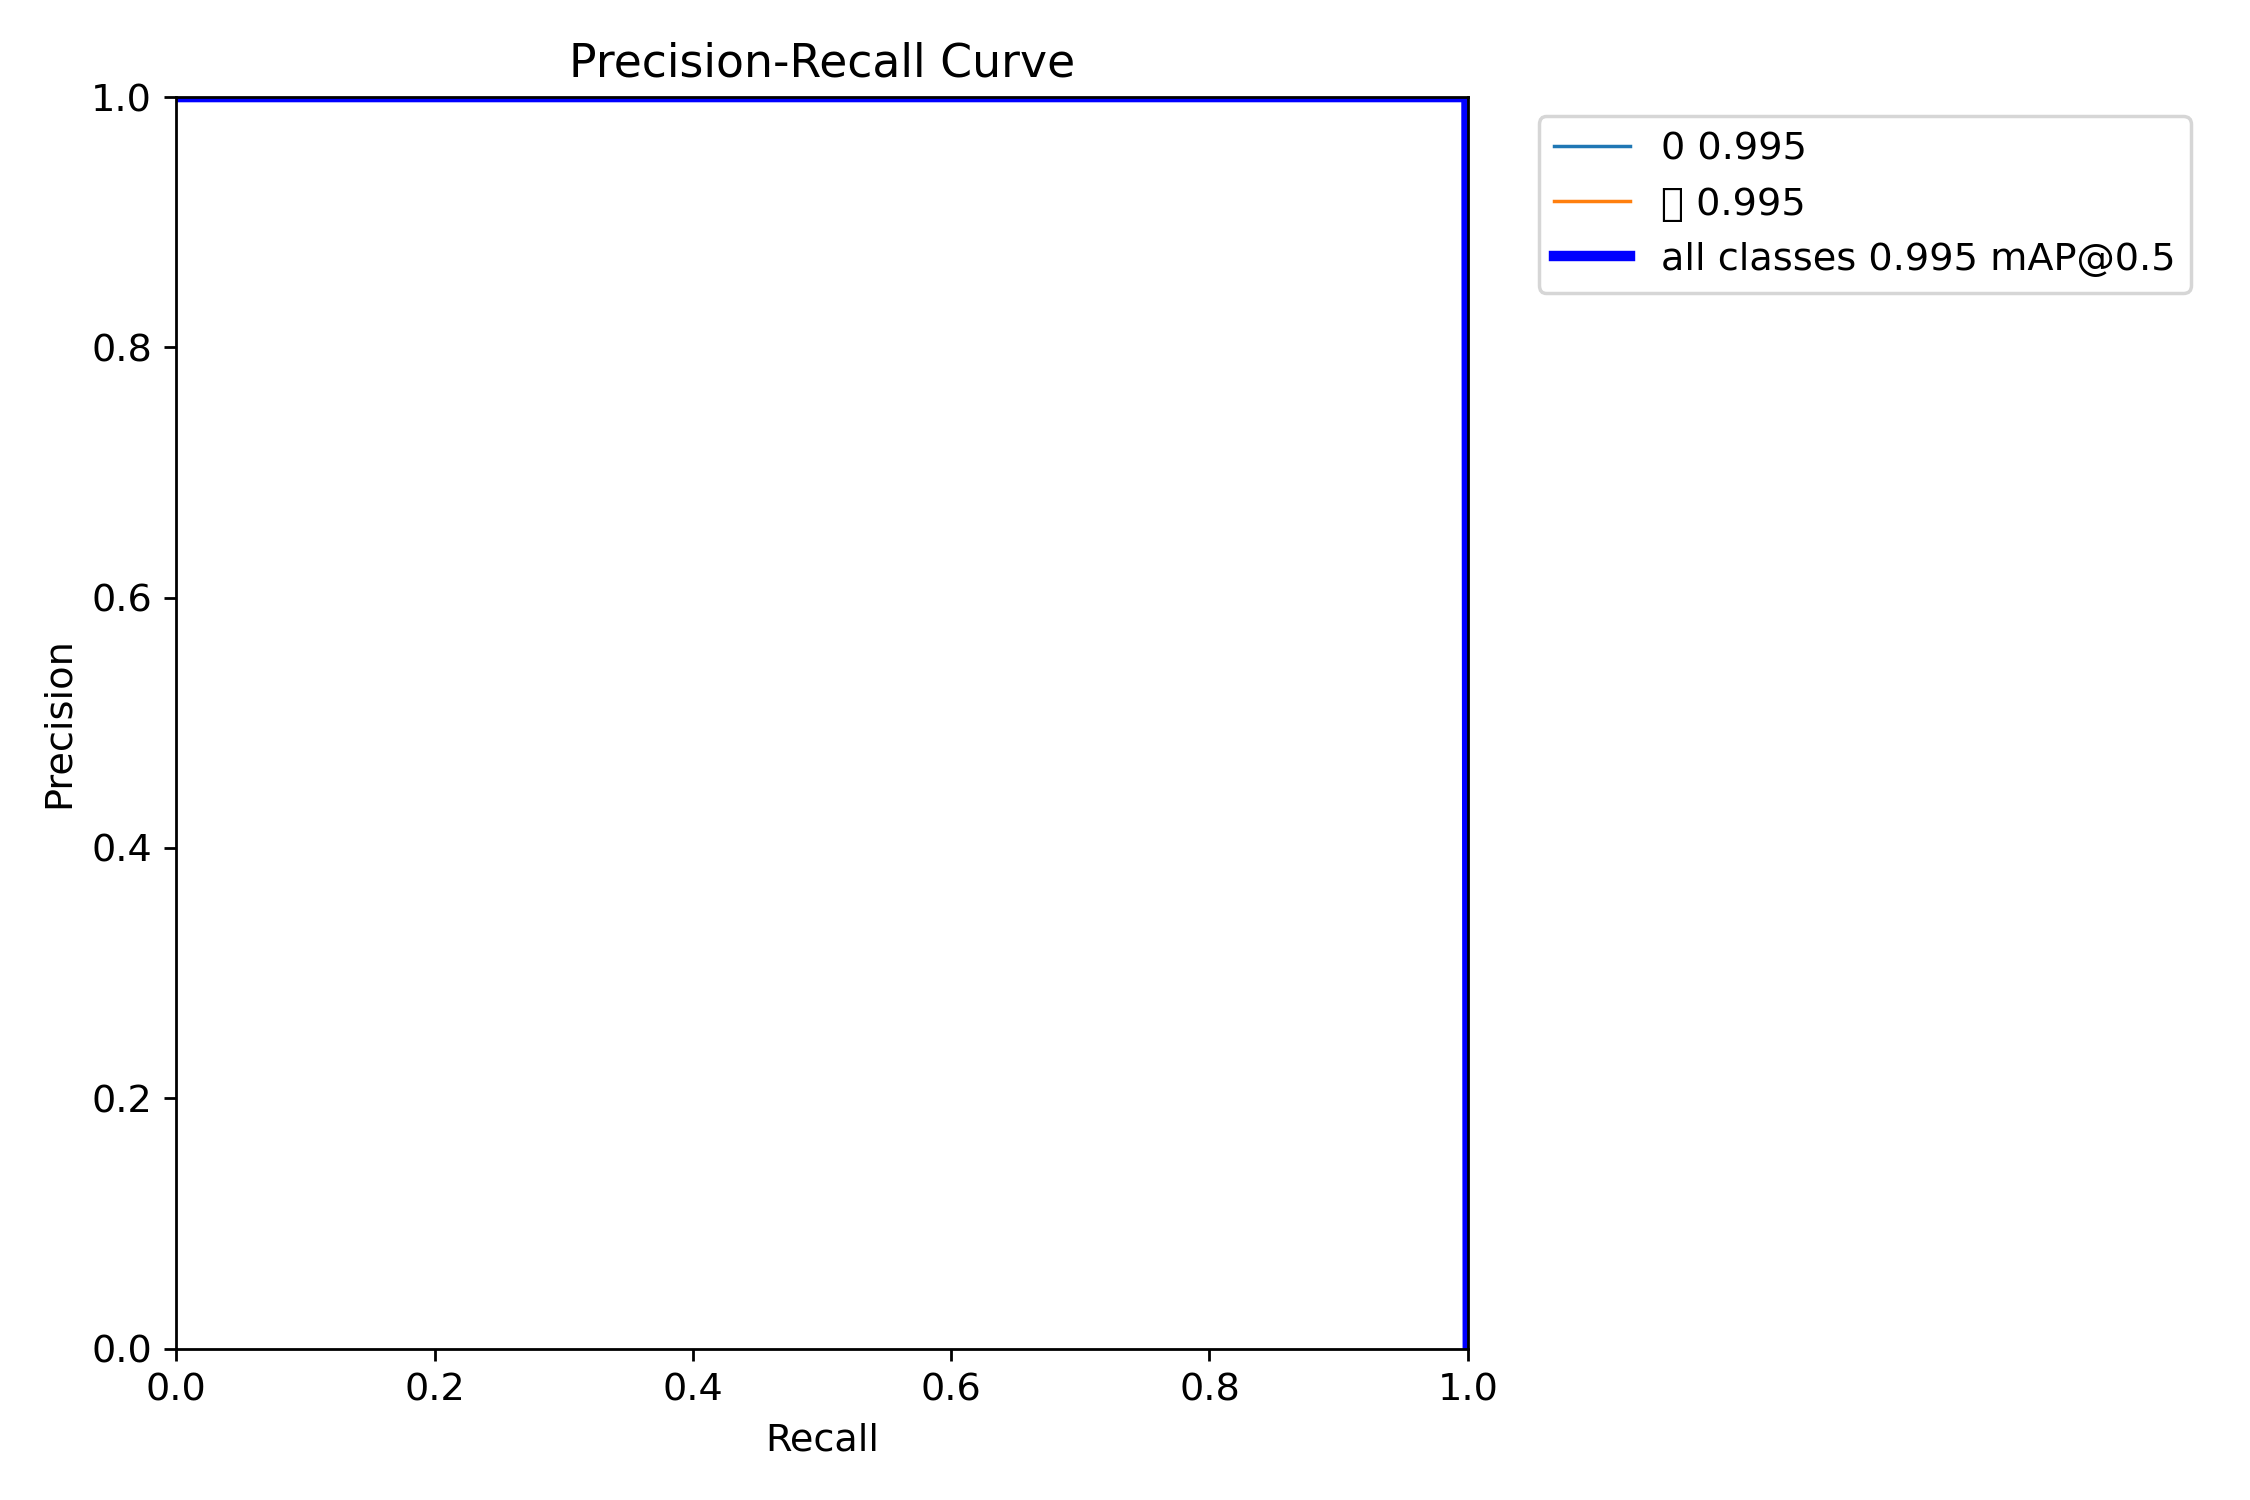

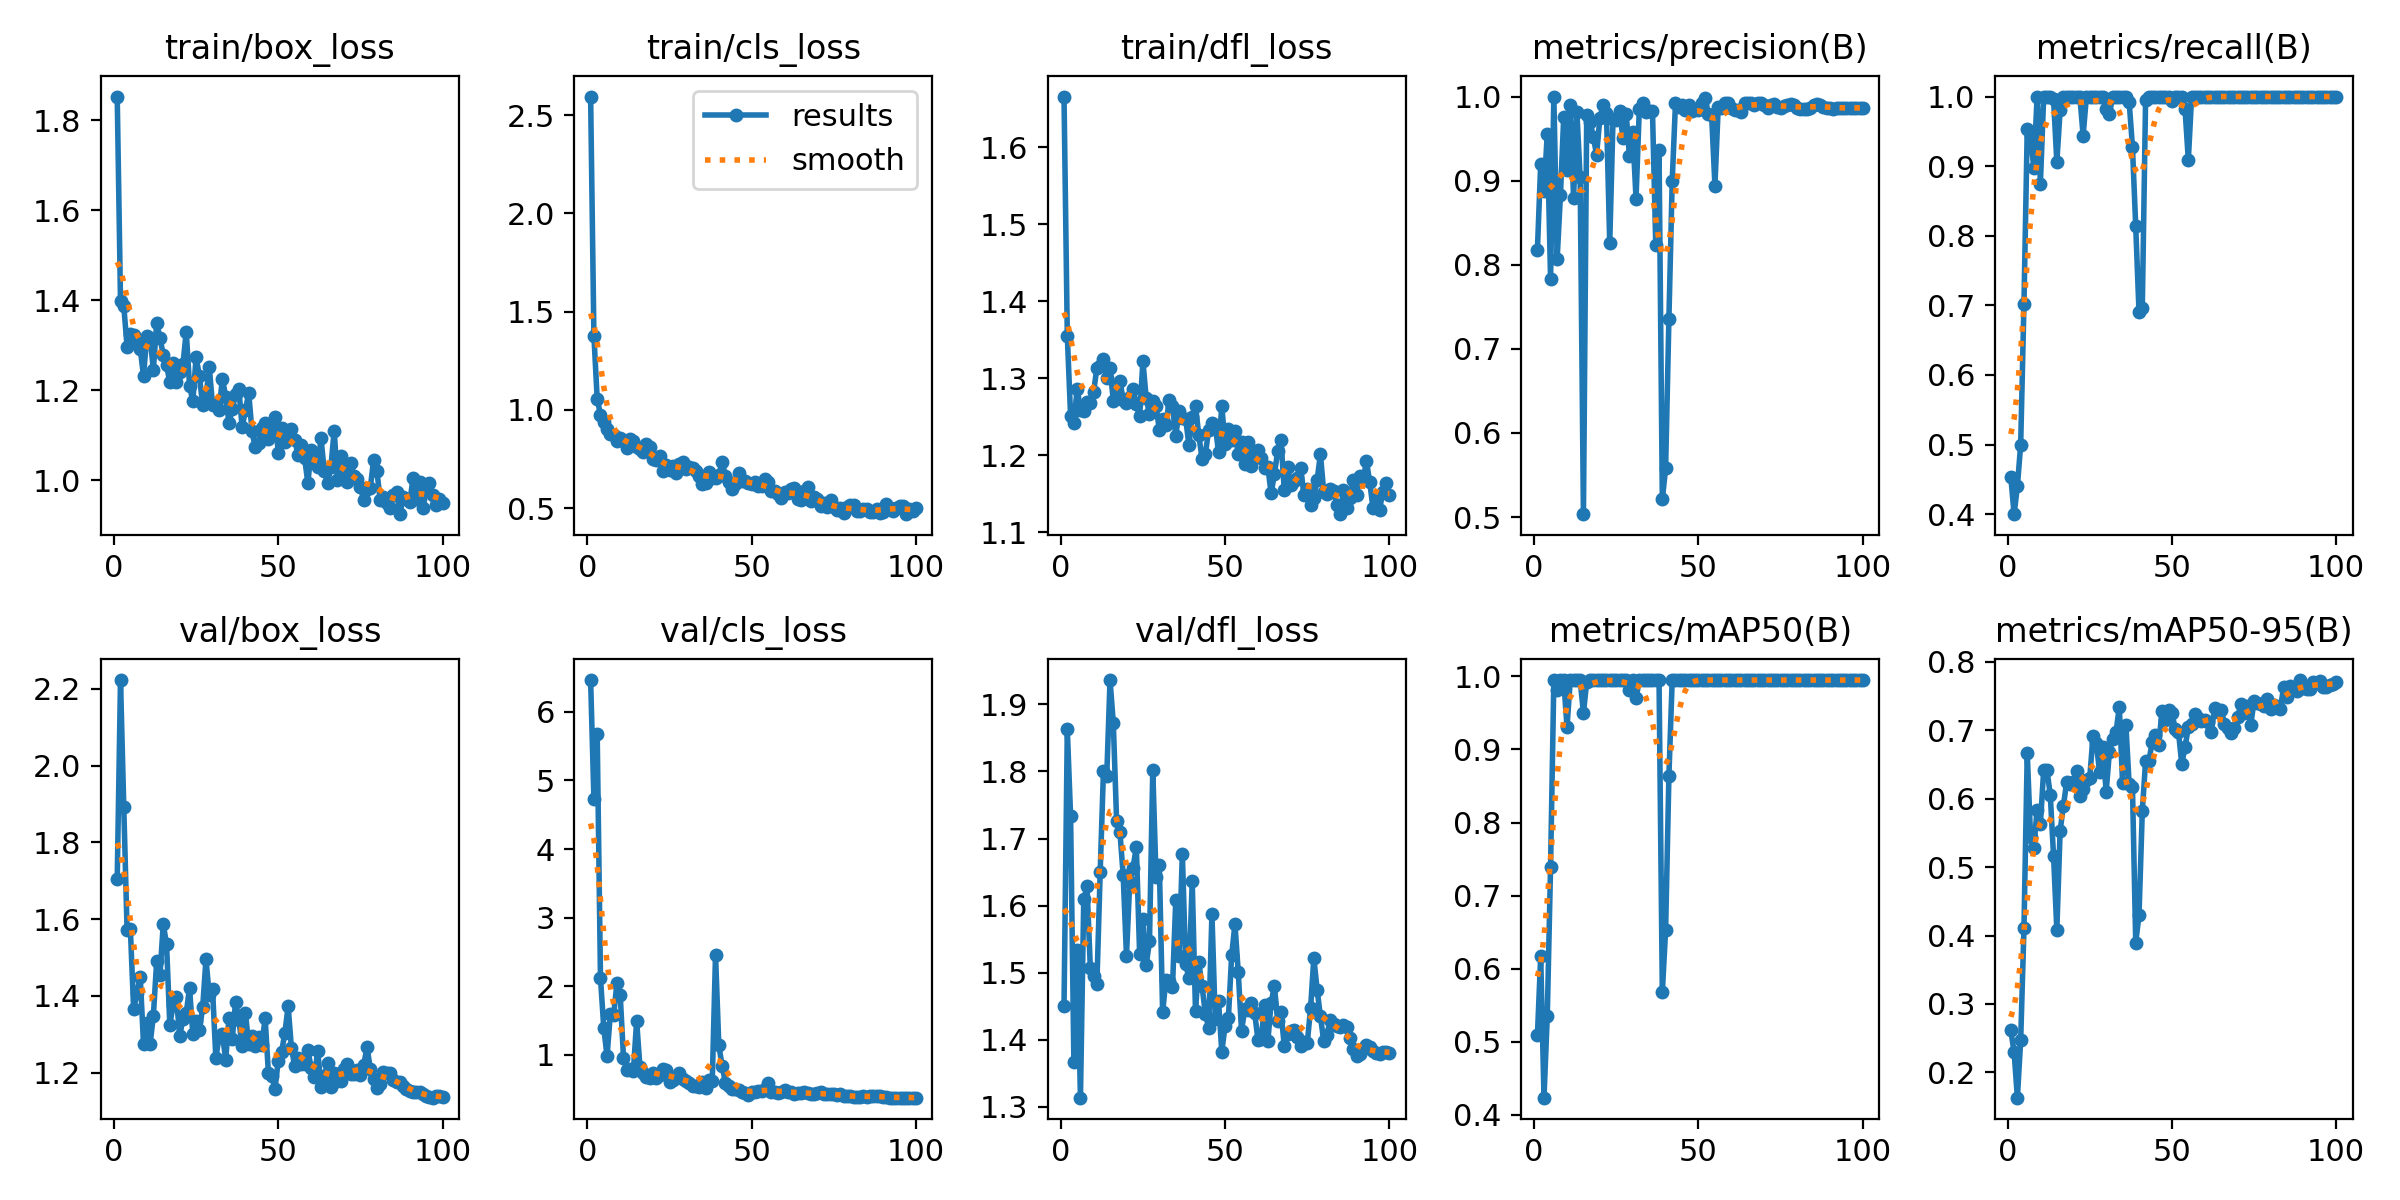

In [9]:
from IPython.display import Image, display
path='/kaggle/working/ASL/train'
image=[f for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

for i in range(len(image)):
    display(Image(filename=path+'/'+image[i]))

In [10]:
metrics=model.val()
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")    
print(f"Mean Average Precision @ .50   : {metrics.box.map50}") 
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv5s summary (fused): 193 layers, 9,113,084 parameters, 0 gradients, 23.8 GFLOPs


val: Scanning /kaggle/input/bangla-sign-numeric/Data Sign/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 537.06it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/bangla-sign-numeric/Data Sign/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:469: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:469: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:494: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font

                   all         29         29      0.987          1      0.995      0.773
                     0         25         25      0.998          1      0.995      0.738
                     ১          4          4      0.976          1      0.995      0.809


/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2536 (\N{BENGALI DIGIT TWO}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2537 (\N{BENGALI DIGIT THREE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarning: Glyph 2535 (\N{BENGALI DIGIT ONE}) missing from current font.
  fig.savefig(plot_fname, dpi=250)
/usr/local/lib/python3.10/dist-packages/ultralytics/utils/metrics.py:431: UserWarnin

Speed: 0.2ms preprocess, 57.8ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to ASL/train2
Mean Average Precision @.5:.95 : 0.7734420057720057
Mean Average Precision @ .50   : 0.995
Mean Average Precision @ .70   : 0.9529
